# Train and Test Neural Network for best Hyperparameter

This notebook is used to train and test the neural network based on one single ticker. The reason for this is to minimize the computation effort for optimizing the hyperparamneter of our neural network.

For our neural network we the open source machine learning framework Tensorflow.

<div align="center">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCgxE_rPpXPy3QBugNifgsmfLnbGVkFKjIHfOX0IovKjv6eMU3">
</div>

**Tensorflow**

TensorFlow is an open-source machine learning library for research and production. TensorFlow offers APIs for beginners and experts to develop for desktop, mobile, web, and cloud. See the sections below to get started.

For more information please take a look under following link: [Tensorflow.com](https://www.tensorflow.org/tutorials)

# Content

 1. Import dependencies
 2. Load data
 3. Prepare our dataframe
 4. Train and test our neural network with different hyperparameters
 5. Result

<hr>

## 1. Import dependencies

In [38]:
import pandas as pd
import numpy as np
from numpy import concatenate
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from  pandas  import  DataFrame
from  pandas  import  concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Activation
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.backend import tensorflow_backend as K
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV

## 2. Load data

### Load data from build csv file for single ticker

In [39]:
df = pd.read_csv('Prepared Data/Training_set_NN1.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,var2(t-150),var3(t-150),var2(t-149),var3(t-149),var2(t-148),var3(t-148),var2(t-147),var3(t-147),var2(t-146),var3(t-146),...,var2(t+88),var3(t+88),var2(t+89),var3(t+89),var2(t+90),var3(t+90),Y1,Y2,Y3,Date
0,0.310566,0.075460,0.239299,0.074575,0.423775,0.068674,0.609032,0.062815,0.444209,0.062630,...,0.268147,0.011611,0.298976,0.011636,0.299144,0.010164,0,0,1,2008-08-06
1,0.239299,0.074575,0.423775,0.068674,0.609032,0.062815,0.444209,0.062630,0.531393,0.060859,...,0.298976,0.011636,0.299144,0.010164,0.254234,0.009411,0,0,1,2008-08-07
2,0.423775,0.068674,0.609032,0.062815,0.444209,0.062630,0.531393,0.060859,0.431934,0.063652,...,0.299144,0.010164,0.254234,0.009411,0.314873,0.009418,0,0,1,2008-08-08
3,0.609032,0.062815,0.444209,0.062630,0.531393,0.060859,0.431934,0.063652,0.356585,0.060875,...,0.254234,0.009411,0.314873,0.009418,0.375092,0.006138,0,0,1,2008-08-11
4,0.444209,0.062630,0.531393,0.060859,0.431934,0.063652,0.356585,0.060875,0.316960,0.063061,...,0.314873,0.009418,0.375092,0.006138,0.243912,0.006186,0,0,1,2008-08-12


# 3. Prepare dataframe

### Split into dependend and independent variables

In [40]:
X = df.drop(["Y1","Y2","Y3","Date"],axis=1).values
print(X.shape)

y = df.loc[:, df.columns.intersection(['Y1','Y2','Y3'])].values
print(y.shape)

(2368, 482)
(2368, 3)


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1894, 482) (474, 482) (1894, 3) (474, 3)


# 4. Train and Test Neural Network using different hyperparameter

To train and test the neural network we will use GridsearchCV. 


**GridSearchCV:**
Using GridSeachCV we are able to fit, pedict and evaluate our model.
"The traditional way of performing hyperparameter optimization has been grid search [...] which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm." [Source](https://en.wikipedia.org/wiki/Hyperparameter_optimization)

To estimate this generalization performance we will use Cross Validation (CV).



To run the following code it is recommended to run it on a Cloud server e.g. on Amazon Web Service (AWS)

##### Define model 

In [17]:
# Define model
def create_model(optimizer='adam',init_mode1='uniform',
                 init_mode_output='uniform',activation_function1="linear",
                dropout_rate=0.0, weight_constraint=0, 
                loss='mean_squared_error',activation_output='linear'):
    
    model = Sequential()
                            
    #Setup neural network
    model.add(Dense(500, input_dim=482, activation=activation_function1, kernel_initializer=init_mode1, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, activation=activation_function1, kernel_initializer=init_mode1, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation=activation_function1, kernel_initializer=init_mode1, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation=activation_function1, kernel_initializer=init_mode1, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation=activation_output, kernel_initializer=init_mode_output))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model



##### Define parameter and run GridSeachCV

In [ ]:
# define the grid search parameters

# Batch Size
batch_size = [10, 100]

# Optimizer
optimizer = ['SGD', 'Adam']

# Network Weight Initialization
init_mode1 = ['uniform', 'normal', 'zero']
init_mode_output = ['uniform', 'normal', 'zero']

# Activation function
activation1 = ['relu', 'tanh', 'sigmoid', 'linear']
activation_output = ['relu', 'tanh', 'sigmoid', 'linear']

# Dropout Regularization
weight_constraint = [1, 2, 3]
dropout_rate = [0.0, 0.1, 0.2]



# create model
model = KerasClassifier(build_fn=create_model, epochs=50, verbose=2)

param_grid = dict(batch_size=batch_size, init_mode1=init_mode1, init_mode_output=init_mode_output, 
                  optimizer=optimizer,activation_function1=activation1,activation_output=activation_output,
                  dropout_rate=dropout_rate, weight_constraint=weight_constraint)

# CV k=3 (standard)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=2)
grid_result = grid.fit(X, y)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/50
 - 1s - loss: 0.2039 - acc: 0.8080
Epoch 2/50
 - 0s - loss: 0.1220 - acc: 0.8080
Epoch 3/50
 - 0s - loss: 0.1122 - acc: 0.8080
Epoch 4/50
 - 0s - loss: 0.1111 - acc: 0.8080
Epoch 5/50
 - 0s - loss: 0.1110 - acc: 0.8080
Epoch 6/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 7/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 8/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 9/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 10/50
 - 1s - loss: 0.1109 - acc: 0.8080
Epoch 11/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 12/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 13/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 14/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 15/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 16/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 17/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 18/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 19/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 20/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 21/50
 - 0s - loss: 0.1109 - acc: 0.8080
Epoch 22/50
 - 0s - lo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.4s remaining:    0.0s


Epoch 1/50
 - 1s - loss: 0.2193 - acc: 0.7277
Epoch 2/50
 - 0s - loss: 0.1455 - acc: 0.7353
Epoch 3/50
 - 0s - loss: 0.1365 - acc: 0.7353
Epoch 4/50
 - 0s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 7/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 8/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 11/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 13/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 14/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 15/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 16/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 17/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 18/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 19/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 20/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 21/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 22/50
 - 0s - lo

 - 0s - loss: 0.1366 - acc: 0.7353
Epoch 4/50
 - 0s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 7/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 8/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 11/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 13/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 14/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 15/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 16/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 17/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 18/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 19/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 20/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 21/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 22/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 23/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 24/50
 - 0s - loss: 0.135

Epoch 6/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 7/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 8/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 11/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 13/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 14/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 15/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 16/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 17/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 18/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 19/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 20/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 21/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 22/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 23/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 24/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 25/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 26/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 27/50
 - 0s

 - 1s - loss: 0.0648 - acc: 0.8911
Epoch 9/50
 - 1s - loss: 0.0596 - acc: 0.9037
Epoch 10/50
 - 1s - loss: 0.0492 - acc: 0.9170
Epoch 11/50
 - 1s - loss: 0.0496 - acc: 0.9037
Epoch 12/50
 - 1s - loss: 0.0539 - acc: 0.9082
Epoch 13/50
 - 1s - loss: 0.0504 - acc: 0.9145
Epoch 14/50
 - 1s - loss: 0.0493 - acc: 0.9139
Epoch 15/50
 - 1s - loss: 0.0472 - acc: 0.9189
Epoch 16/50
 - 1s - loss: 0.0429 - acc: 0.9208
Epoch 17/50
 - 1s - loss: 0.0454 - acc: 0.9177
Epoch 18/50
 - 1s - loss: 0.0436 - acc: 0.9183
Epoch 19/50
 - 1s - loss: 0.0439 - acc: 0.9202
Epoch 20/50
 - 1s - loss: 0.0420 - acc: 0.9253
Epoch 21/50
 - 1s - loss: 0.0372 - acc: 0.9405
Epoch 22/50
 - 1s - loss: 0.0401 - acc: 0.9303
Epoch 23/50
 - 1s - loss: 0.0398 - acc: 0.9297
Epoch 24/50
 - 1s - loss: 0.0413 - acc: 0.9253
Epoch 25/50
 - 1s - loss: 0.0455 - acc: 0.9126
Epoch 26/50
 - 1s - loss: 0.0412 - acc: 0.9322
Epoch 27/50
 - 1s - loss: 0.0412 - acc: 0.9297
Epoch 28/50
 - 1s - loss: 0.0343 - acc: 0.9354
Epoch 29/50
 - 1s - loss: 

 - 1s - loss: 0.0484 - acc: 0.9221
Epoch 11/50
 - 1s - loss: 0.0421 - acc: 0.9253
Epoch 12/50
 - 1s - loss: 0.0399 - acc: 0.9278
Epoch 13/50
 - 1s - loss: 0.0379 - acc: 0.9329
Epoch 14/50
 - 1s - loss: 0.0412 - acc: 0.9284
Epoch 15/50
 - 1s - loss: 0.0397 - acc: 0.9259
Epoch 16/50
 - 1s - loss: 0.0360 - acc: 0.9329
Epoch 17/50
 - 1s - loss: 0.0352 - acc: 0.9322
Epoch 18/50
 - 1s - loss: 0.0354 - acc: 0.9329
Epoch 19/50
 - 1s - loss: 0.0335 - acc: 0.9360
Epoch 20/50
 - 1s - loss: 0.0420 - acc: 0.9227
Epoch 21/50
 - 1s - loss: 0.0371 - acc: 0.9310
Epoch 22/50
 - 1s - loss: 0.0336 - acc: 0.9354
Epoch 23/50
 - 1s - loss: 0.0306 - acc: 0.9379
Epoch 24/50
 - 1s - loss: 0.0397 - acc: 0.9253
Epoch 25/50
 - 1s - loss: 0.0297 - acc: 0.9424
Epoch 26/50
 - 1s - loss: 0.0404 - acc: 0.9284
Epoch 27/50
 - 1s - loss: 0.0376 - acc: 0.9310
Epoch 28/50
 - 1s - loss: 0.0322 - acc: 0.9417
Epoch 29/50
 - 1s - loss: 0.0314 - acc: 0.9468
Epoch 30/50
 - 1s - loss: 0.0305 - acc: 0.9417
Epoch 31/50
 - 1s - loss:

 - 1s - loss: 0.0457 - acc: 0.9196
Epoch 13/50
 - 1s - loss: 0.0458 - acc: 0.9240
Epoch 14/50
 - 1s - loss: 0.0414 - acc: 0.9291
Epoch 15/50
 - 1s - loss: 0.0483 - acc: 0.9215
Epoch 16/50
 - 1s - loss: 0.0469 - acc: 0.9183
Epoch 17/50
 - 1s - loss: 0.0491 - acc: 0.9139
Epoch 18/50
 - 1s - loss: 0.0412 - acc: 0.9265
Epoch 19/50
 - 1s - loss: 0.0377 - acc: 0.9367
Epoch 20/50
 - 1s - loss: 0.0410 - acc: 0.9303
Epoch 21/50
 - 1s - loss: 0.0378 - acc: 0.9316
Epoch 22/50
 - 1s - loss: 0.0415 - acc: 0.9284
Epoch 23/50
 - 1s - loss: 0.0363 - acc: 0.9392
Epoch 24/50
 - 1s - loss: 0.0375 - acc: 0.9367
Epoch 25/50
 - 1s - loss: 0.0405 - acc: 0.9240
Epoch 26/50
 - 1s - loss: 0.0353 - acc: 0.9373
Epoch 27/50
 - 1s - loss: 0.0331 - acc: 0.9398
Epoch 28/50
 - 1s - loss: 0.0377 - acc: 0.9348
Epoch 29/50
 - 1s - loss: 0.0321 - acc: 0.9430
Epoch 30/50
 - 1s - loss: 0.0364 - acc: 0.9341
Epoch 31/50
 - 1s - loss: 0.0349 - acc: 0.9341
Epoch 32/50
 - 1s - loss: 0.0370 - acc: 0.9329
Epoch 33/50
 - 1s - loss:

Epoch 15/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 17/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 35/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 36/50
 

 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1345 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1343 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1340 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1338 - acc: 0.7353
Epoch 35/50
 - 1s - loss: 0.1336 - acc: 0.7353
Epoch 36/50
 - 1s - loss: 0.1333 - acc: 0.7353
Epoch 37/50
 - 1s - loss: 0.1329 - acc: 0.7353
Epoch 38/50
 - 1s - loss:

Epoch 20/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 35/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 36/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 37/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 38/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 39/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 40/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 41/50
 

 - 1s - loss: 0.0383 - acc: 0.9322
Epoch 23/50
 - 1s - loss: 0.0373 - acc: 0.9335
Epoch 24/50
 - 1s - loss: 0.0395 - acc: 0.9291
Epoch 25/50
 - 1s - loss: 0.0386 - acc: 0.9322
Epoch 26/50
 - 1s - loss: 0.0450 - acc: 0.9221
Epoch 27/50
 - 1s - loss: 0.0355 - acc: 0.9373
Epoch 28/50
 - 1s - loss: 0.0390 - acc: 0.9259
Epoch 29/50
 - 1s - loss: 0.0379 - acc: 0.9316
Epoch 30/50
 - 1s - loss: 0.0360 - acc: 0.9303
Epoch 31/50
 - 1s - loss: 0.0407 - acc: 0.9272
Epoch 32/50
 - 1s - loss: 0.0353 - acc: 0.9436
Epoch 33/50
 - 1s - loss: 0.0391 - acc: 0.9291
Epoch 34/50
 - 1s - loss: 0.0398 - acc: 0.9316
Epoch 35/50
 - 1s - loss: 0.0456 - acc: 0.9158
Epoch 36/50
 - 1s - loss: 0.0365 - acc: 0.9392
Epoch 37/50
 - 1s - loss: 0.0414 - acc: 0.9253
Epoch 38/50
 - 1s - loss: 0.0355 - acc: 0.9373
Epoch 39/50
 - 1s - loss: 0.0376 - acc: 0.9335
Epoch 40/50
 - 1s - loss: 0.0375 - acc: 0.9341
Epoch 41/50
 - 1s - loss: 0.0321 - acc: 0.9430
Epoch 42/50
 - 1s - loss: 0.0430 - acc: 0.9246
Epoch 43/50
 - 1s - loss:

Epoch 25/50
 - 1s - loss: 0.0304 - acc: 0.9436
Epoch 26/50
 - 1s - loss: 0.0311 - acc: 0.9443
Epoch 27/50
 - 1s - loss: 0.0294 - acc: 0.9474
Epoch 28/50
 - 1s - loss: 0.0452 - acc: 0.9215
Epoch 29/50
 - 1s - loss: 0.0311 - acc: 0.9398
Epoch 30/50
 - 1s - loss: 0.0324 - acc: 0.9335
Epoch 31/50
 - 1s - loss: 0.0297 - acc: 0.9436
Epoch 32/50
 - 1s - loss: 0.0371 - acc: 0.9341
Epoch 33/50
 - 1s - loss: 0.0364 - acc: 0.9265
Epoch 34/50
 - 1s - loss: 0.0274 - acc: 0.9430
Epoch 35/50
 - 1s - loss: 0.0261 - acc: 0.9481
Epoch 36/50
 - 1s - loss: 0.0311 - acc: 0.9455
Epoch 37/50
 - 1s - loss: 0.0278 - acc: 0.9493
Epoch 38/50
 - 1s - loss: 0.0348 - acc: 0.9354
Epoch 39/50
 - 1s - loss: 0.0366 - acc: 0.9354
Epoch 40/50
 - 1s - loss: 0.0298 - acc: 0.9468
Epoch 41/50
 - 1s - loss: 0.0231 - acc: 0.9601
Epoch 42/50
 - 1s - loss: 0.0461 - acc: 0.9202
Epoch 43/50
 - 1s - loss: 0.0263 - acc: 0.9544
Epoch 44/50
 - 1s - loss: 0.0256 - acc: 0.9588
Epoch 45/50
 - 1s - loss: 0.0282 - acc: 0.9506
Epoch 46/50
 

 - 1s - loss: 0.0295 - acc: 0.9443
Epoch 28/50
 - 1s - loss: 0.0283 - acc: 0.9493
Epoch 29/50
 - 1s - loss: 0.0316 - acc: 0.9462
Epoch 30/50
 - 1s - loss: 0.0328 - acc: 0.9443
Epoch 31/50
 - 1s - loss: 0.0258 - acc: 0.9519
Epoch 32/50
 - 1s - loss: 0.0303 - acc: 0.9462
Epoch 33/50
 - 1s - loss: 0.0324 - acc: 0.9417
Epoch 34/50
 - 1s - loss: 0.0284 - acc: 0.9487
Epoch 35/50
 - 1s - loss: 0.0258 - acc: 0.9557
Epoch 36/50
 - 1s - loss: 0.0376 - acc: 0.9310
Epoch 37/50
 - 1s - loss: 0.0252 - acc: 0.9550
Epoch 38/50
 - 1s - loss: 0.0288 - acc: 0.9493
Epoch 39/50
 - 1s - loss: 0.0300 - acc: 0.9424
Epoch 40/50
 - 1s - loss: 0.0284 - acc: 0.9531
Epoch 41/50
 - 1s - loss: 0.0297 - acc: 0.9462
Epoch 42/50
 - 1s - loss: 0.0193 - acc: 0.9702
Epoch 43/50
 - 1s - loss: 0.0223 - acc: 0.9569
Epoch 44/50
 - 1s - loss: 0.0217 - acc: 0.9614
Epoch 45/50
 - 1s - loss: 0.0209 - acc: 0.9645
Epoch 46/50
 - 1s - loss: 0.0265 - acc: 0.9557
Epoch 47/50
 - 1s - loss: 0.0288 - acc: 0.9481
Epoch 48/50
 - 1s - loss:

Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activat

Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight

Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight_constraint=3, total=  35.6s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, ini

Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=1, total=  46.2s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc

Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=2, total=  47.1s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0

Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=3, total=  45.1s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.27

Epoch 48/50
 - 1s - loss: 0.1059 - acc: 0.8113
Epoch 49/50
 - 1s - loss: 0.1050 - acc: 0.8132
Epoch 50/50
 - 1s - loss: 0.1042 - acc: 0.8151
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total=  40.5s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 3s - loss: 0.2389 - acc: 0.6409
Epoch 2/50
 - 1s - loss: 0.1774 - acc: 0.6422
Epoch 3/50
 - 1s - loss: 0.1700 - acc: 0.6422
Epoch 4/50
 - 1s - loss: 0.1690 - acc: 0.6422
Epoch 5/50
 - 1s - loss: 0.1689 - acc: 0.6422
Epoch 6/50
 - 1s - loss: 0.1689 - acc: 0.6422
Epoch 7/50
 - 1s - loss: 0.1689 - acc: 0.6422
Epoch 8/50
 - 1s - loss: 0.1689 - acc: 0.6422
Epoch 9/50
 - 1s - loss: 0.1689 - acc: 0.6422
Epoch 10/50
 - 1s - loss: 0.1688 - acc: 0.6422
Epoch 11/50
 - 1s - loss: 0.1688 - acc: 0.6

 - 1s - loss: 0.0999 - acc: 0.8189
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total=  39.4s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 3s - loss: 0.2374 - acc: 0.6409
Epoch 2/50
 - 1s - loss: 0.1771 - acc: 0.6422
Epoch 3/50
 - 1s - loss: 0.1699 - acc: 0.6422
Epoch 4/50
 - 1s - loss: 0.1690 - acc: 0.6422
Epoch 5/50
 - 1s - loss: 0.1688 - acc: 0.6422
Epoch 6/50
 - 1s - loss: 0.1688 - acc: 0.6422
Epoch 7/50
 - 1s - loss: 0.1687 - acc: 0.6422
Epoch 8/50
 - 1s - loss: 0.1687 - acc: 0.6422
Epoch 9/50
 - 1s - loss: 0.1687 - acc: 0.6422
Epoch 10/50
 - 1s - loss: 0.1687 - acc: 0.6422
Epoch 11/50
 - 1s - loss: 0.1686 - acc: 0.6422
Epoch 12/50
 - 1s - loss: 0.1686 - acc: 0.6422
Epoch 13/50
 - 1s - loss: 0.1685 - acc: 0.6422
Epoch 14

Epoch 1/50
 - 3s - loss: 0.2542 - acc: 0.6308
Epoch 2/50
 - 1s - loss: 0.2011 - acc: 0.6422
Epoch 3/50
 - 1s - loss: 0.1943 - acc: 0.6422
Epoch 4/50
 - 1s - loss: 0.1935 - acc: 0.6422
Epoch 5/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 6/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 7/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 8/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 9/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 10/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 11/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 12/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 13/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 14/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 15/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 16/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 17/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 18/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 19/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 20/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 21/50
 - 1s - loss: 0.1934 - acc: 0.6422
Epoch 22/50
 - 1s - lo

 - 1s - loss: 0.1194 - acc: 0.7574
Epoch 4/50
 - 1s - loss: 0.0887 - acc: 0.8442
Epoch 5/50
 - 1s - loss: 0.0675 - acc: 0.8841
Epoch 6/50
 - 1s - loss: 0.0615 - acc: 0.8987
Epoch 7/50
 - 1s - loss: 0.0626 - acc: 0.8885
Epoch 8/50
 - 1s - loss: 0.0548 - acc: 0.9037
Epoch 9/50
 - 1s - loss: 0.0626 - acc: 0.8904
Epoch 10/50
 - 1s - loss: 0.0538 - acc: 0.9088
Epoch 11/50
 - 1s - loss: 0.0469 - acc: 0.9145
Epoch 12/50
 - 1s - loss: 0.0531 - acc: 0.9025
Epoch 13/50
 - 1s - loss: 0.0436 - acc: 0.9246
Epoch 14/50
 - 1s - loss: 0.0564 - acc: 0.9006
Epoch 15/50
 - 1s - loss: 0.0459 - acc: 0.9202
Epoch 16/50
 - 1s - loss: 0.0490 - acc: 0.9107
Epoch 17/50
 - 1s - loss: 0.0425 - acc: 0.9208
Epoch 18/50
 - 1s - loss: 0.0433 - acc: 0.9183
Epoch 19/50
 - 1s - loss: 0.0399 - acc: 0.9297
Epoch 20/50
 - 1s - loss: 0.0401 - acc: 0.9246
Epoch 21/50
 - 1s - loss: 0.0390 - acc: 0.9259
Epoch 22/50
 - 1s - loss: 0.0401 - acc: 0.9253
Epoch 23/50
 - 1s - loss: 0.0349 - acc: 0.9386
Epoch 24/50
 - 1s - loss: 0.034

Epoch 6/50
 - 1s - loss: 0.0596 - acc: 0.8974
Epoch 7/50
 - 1s - loss: 0.0527 - acc: 0.9126
Epoch 8/50
 - 1s - loss: 0.0499 - acc: 0.9126
Epoch 9/50
 - 1s - loss: 0.0483 - acc: 0.9151
Epoch 10/50
 - 1s - loss: 0.0467 - acc: 0.9196
Epoch 11/50
 - 1s - loss: 0.0646 - acc: 0.8809
Epoch 12/50
 - 1s - loss: 0.0499 - acc: 0.9107
Epoch 13/50
 - 1s - loss: 0.0400 - acc: 0.9259
Epoch 14/50
 - 1s - loss: 0.0395 - acc: 0.9303
Epoch 15/50
 - 1s - loss: 0.0411 - acc: 0.9265
Epoch 16/50
 - 1s - loss: 0.0397 - acc: 0.9240
Epoch 17/50
 - 1s - loss: 0.0357 - acc: 0.9341
Epoch 18/50
 - 1s - loss: 0.0330 - acc: 0.9392
Epoch 19/50
 - 1s - loss: 0.0322 - acc: 0.9386
Epoch 20/50
 - 1s - loss: 0.0358 - acc: 0.9310
Epoch 21/50
 - 1s - loss: 0.0344 - acc: 0.9329
Epoch 22/50
 - 1s - loss: 0.0308 - acc: 0.9379
Epoch 23/50
 - 1s - loss: 0.0303 - acc: 0.9392
Epoch 24/50
 - 1s - loss: 0.0277 - acc: 0.9424
Epoch 25/50
 - 1s - loss: 0.0293 - acc: 0.9462
Epoch 26/50
 - 1s - loss: 0.0332 - acc: 0.9335
Epoch 27/50
 - 1s

 - 1s - loss: 0.0477 - acc: 0.9253
Epoch 9/50
 - 1s - loss: 0.0489 - acc: 0.9189
Epoch 10/50
 - 1s - loss: 0.0459 - acc: 0.9189
Epoch 11/50
 - 1s - loss: 0.0401 - acc: 0.9316
Epoch 12/50
 - 1s - loss: 0.0408 - acc: 0.9265
Epoch 13/50
 - 1s - loss: 0.0407 - acc: 0.9227
Epoch 14/50
 - 1s - loss: 0.0377 - acc: 0.9335
Epoch 15/50
 - 1s - loss: 0.0369 - acc: 0.9329
Epoch 16/50
 - 1s - loss: 0.0348 - acc: 0.9329
Epoch 17/50
 - 1s - loss: 0.0360 - acc: 0.9335
Epoch 18/50
 - 1s - loss: 0.0337 - acc: 0.9348
Epoch 19/50
 - 1s - loss: 0.0332 - acc: 0.9348
Epoch 20/50
 - 1s - loss: 0.0308 - acc: 0.9424
Epoch 21/50
 - 1s - loss: 0.0254 - acc: 0.9550
Epoch 22/50
 - 1s - loss: 0.0264 - acc: 0.9531
Epoch 23/50
 - 1s - loss: 0.0296 - acc: 0.9481
Epoch 24/50
 - 1s - loss: 0.0227 - acc: 0.9626
Epoch 25/50
 - 1s - loss: 0.0236 - acc: 0.9607
Epoch 26/50
 - 1s - loss: 0.0200 - acc: 0.9677
Epoch 27/50
 - 1s - loss: 0.0195 - acc: 0.9683
Epoch 28/50
 - 1s - loss: 0.0179 - acc: 0.9683
Epoch 29/50
 - 1s - loss: 

Epoch 11/50
 - 1s - loss: 0.1711 - acc: 0.6422
Epoch 12/50
 - 1s - loss: 0.1711 - acc: 0.6422
Epoch 13/50
 - 1s - loss: 0.1710 - acc: 0.6422
Epoch 14/50
 - 1s - loss: 0.1710 - acc: 0.6422
Epoch 15/50
 - 1s - loss: 0.1709 - acc: 0.6422
Epoch 16/50
 - 1s - loss: 0.1709 - acc: 0.6422
Epoch 17/50
 - 1s - loss: 0.1708 - acc: 0.6422
Epoch 18/50
 - 1s - loss: 0.1707 - acc: 0.6422
Epoch 19/50
 - 1s - loss: 0.1706 - acc: 0.6422
Epoch 20/50
 - 1s - loss: 0.1705 - acc: 0.6422
Epoch 21/50
 - 1s - loss: 0.1704 - acc: 0.6422
Epoch 22/50
 - 1s - loss: 0.1703 - acc: 0.6422
Epoch 23/50
 - 1s - loss: 0.1701 - acc: 0.6422
Epoch 24/50
 - 1s - loss: 0.1700 - acc: 0.6422
Epoch 25/50
 - 1s - loss: 0.1698 - acc: 0.6422
Epoch 26/50
 - 1s - loss: 0.1695 - acc: 0.6422
Epoch 27/50
 - 1s - loss: 0.1693 - acc: 0.6422
Epoch 28/50
 - 1s - loss: 0.1690 - acc: 0.6422
Epoch 29/50
 - 1s - loss: 0.1686 - acc: 0.6422
Epoch 30/50
 - 1s - loss: 0.1682 - acc: 0.6422
Epoch 31/50
 - 1s - loss: 0.1675 - acc: 0.6422
Epoch 32/50
 

Epoch 14/50
 - 1s - loss: 0.1684 - acc: 0.6422
Epoch 15/50
 - 1s - loss: 0.1683 - acc: 0.6422
Epoch 16/50
 - 1s - loss: 0.1682 - acc: 0.6422
Epoch 17/50
 - 1s - loss: 0.1681 - acc: 0.6422
Epoch 18/50
 - 1s - loss: 0.1680 - acc: 0.6422
Epoch 19/50
 - 1s - loss: 0.1678 - acc: 0.6422
Epoch 20/50
 - 1s - loss: 0.1677 - acc: 0.6422
Epoch 21/50
 - 1s - loss: 0.1675 - acc: 0.6422
Epoch 22/50
 - 1s - loss: 0.1672 - acc: 0.6422
Epoch 23/50
 - 1s - loss: 0.1670 - acc: 0.6422
Epoch 24/50
 - 1s - loss: 0.1667 - acc: 0.6422
Epoch 25/50
 - 1s - loss: 0.1663 - acc: 0.6422
Epoch 26/50
 - 1s - loss: 0.1658 - acc: 0.6422
Epoch 27/50
 - 1s - loss: 0.1653 - acc: 0.6422
Epoch 28/50
 - 1s - loss: 0.1646 - acc: 0.6422
Epoch 29/50
 - 1s - loss: 0.1639 - acc: 0.6422
Epoch 30/50
 - 1s - loss: 0.1631 - acc: 0.6422
Epoch 31/50
 - 1s - loss: 0.1621 - acc: 0.6422
Epoch 32/50
 - 1s - loss: 0.1611 - acc: 0.6422
Epoch 33/50
 - 1s - loss: 0.1601 - acc: 0.6422
Epoch 34/50
 - 1s - loss: 0.1591 - acc: 0.6422
Epoch 35/50
 

Epoch 17/50
 - 1s - loss: 0.1709 - acc: 0.6422
Epoch 18/50
 - 1s - loss: 0.1709 - acc: 0.6422
Epoch 19/50
 - 1s - loss: 0.1708 - acc: 0.6422
Epoch 20/50
 - 1s - loss: 0.1707 - acc: 0.6422
Epoch 21/50
 - 1s - loss: 0.1706 - acc: 0.6422
Epoch 22/50
 - 1s - loss: 0.1706 - acc: 0.6422
Epoch 23/50
 - 1s - loss: 0.1705 - acc: 0.6422
Epoch 24/50
 - 1s - loss: 0.1704 - acc: 0.6422
Epoch 25/50
 - 1s - loss: 0.1702 - acc: 0.6422
Epoch 26/50
 - 1s - loss: 0.1701 - acc: 0.6422
Epoch 27/50
 - 1s - loss: 0.1699 - acc: 0.6422
Epoch 28/50
 - 1s - loss: 0.1697 - acc: 0.6422
Epoch 29/50
 - 1s - loss: 0.1694 - acc: 0.6422
Epoch 30/50
 - 1s - loss: 0.1692 - acc: 0.6422
Epoch 31/50
 - 1s - loss: 0.1688 - acc: 0.6422
Epoch 32/50
 - 1s - loss: 0.1684 - acc: 0.6422
Epoch 33/50
 - 1s - loss: 0.1679 - acc: 0.6422
Epoch 34/50
 - 1s - loss: 0.1673 - acc: 0.6422
Epoch 35/50
 - 1s - loss: 0.1667 - acc: 0.6422
Epoch 36/50
 - 1s - loss: 0.1659 - acc: 0.6422
Epoch 37/50
 - 1s - loss: 0.1650 - acc: 0.6422
Epoch 38/50
 

 - 1s - loss: 0.0469 - acc: 0.9158
Epoch 20/50
 - 1s - loss: 0.0402 - acc: 0.9329
Epoch 21/50
 - 1s - loss: 0.0407 - acc: 0.9246
Epoch 22/50
 - 1s - loss: 0.0308 - acc: 0.9436
Epoch 23/50
 - 1s - loss: 0.0364 - acc: 0.9335
Epoch 24/50
 - 1s - loss: 0.0430 - acc: 0.9158
Epoch 25/50
 - 1s - loss: 0.0467 - acc: 0.9139
Epoch 26/50
 - 1s - loss: 0.0364 - acc: 0.9354
Epoch 27/50
 - 1s - loss: 0.0384 - acc: 0.9310
Epoch 28/50
 - 1s - loss: 0.0589 - acc: 0.8904
Epoch 29/50
 - 1s - loss: 0.0387 - acc: 0.9278
Epoch 30/50
 - 1s - loss: 0.0343 - acc: 0.9360
Epoch 31/50
 - 1s - loss: 0.0374 - acc: 0.9322
Epoch 32/50
 - 1s - loss: 0.0333 - acc: 0.9360
Epoch 33/50
 - 1s - loss: 0.0286 - acc: 0.9500
Epoch 34/50
 - 1s - loss: 0.0551 - acc: 0.8974
Epoch 35/50
 - 1s - loss: 0.0304 - acc: 0.9449
Epoch 36/50
 - 1s - loss: 0.0276 - acc: 0.9481
Epoch 37/50
 - 1s - loss: 0.0371 - acc: 0.9322
Epoch 38/50
 - 1s - loss: 0.0294 - acc: 0.9506
Epoch 39/50
 - 1s - loss: 0.0319 - acc: 0.9430
Epoch 40/50
 - 1s - loss:

Epoch 22/50
 - 1s - loss: 0.0240 - acc: 0.9563
Epoch 23/50
 - 1s - loss: 0.0263 - acc: 0.9563
Epoch 24/50
 - 1s - loss: 0.0287 - acc: 0.9519
Epoch 25/50
 - 1s - loss: 0.0251 - acc: 0.9550
Epoch 26/50
 - 1s - loss: 0.0226 - acc: 0.9607
Epoch 27/50
 - 1s - loss: 0.0265 - acc: 0.9538
Epoch 28/50
 - 1s - loss: 0.0265 - acc: 0.9519
Epoch 29/50
 - 1s - loss: 0.0184 - acc: 0.9677
Epoch 30/50
 - 1s - loss: 0.0176 - acc: 0.9715
Epoch 31/50
 - 1s - loss: 0.0242 - acc: 0.9563
Epoch 32/50
 - 1s - loss: 0.0263 - acc: 0.9531
Epoch 33/50
 - 1s - loss: 0.0266 - acc: 0.9531
Epoch 34/50
 - 1s - loss: 0.0204 - acc: 0.9620
Epoch 35/50
 - 1s - loss: 0.0172 - acc: 0.9677
Epoch 36/50
 - 1s - loss: 0.0190 - acc: 0.9664
Epoch 37/50
 - 1s - loss: 0.0157 - acc: 0.9715
Epoch 38/50
 - 1s - loss: 0.0180 - acc: 0.9664
Epoch 39/50
 - 1s - loss: 0.0259 - acc: 0.9569
Epoch 40/50
 - 1s - loss: 0.0256 - acc: 0.9512
Epoch 41/50
 - 1s - loss: 0.0168 - acc: 0.9702
Epoch 42/50
 - 1s - loss: 0.0120 - acc: 0.9804
Epoch 43/50
 

 - 1s - loss: 0.0308 - acc: 0.9424
Epoch 25/50
 - 1s - loss: 0.0277 - acc: 0.9493
Epoch 26/50
 - 1s - loss: 0.0256 - acc: 0.9538
Epoch 27/50
 - 1s - loss: 0.0238 - acc: 0.9595
Epoch 28/50
 - 1s - loss: 0.0181 - acc: 0.9702
Epoch 29/50
 - 1s - loss: 0.0291 - acc: 0.9462
Epoch 30/50
 - 1s - loss: 0.0239 - acc: 0.9601
Epoch 31/50
 - 1s - loss: 0.0159 - acc: 0.9715
Epoch 32/50
 - 1s - loss: 0.0172 - acc: 0.9696
Epoch 33/50
 - 1s - loss: 0.0199 - acc: 0.9658
Epoch 34/50
 - 1s - loss: 0.0174 - acc: 0.9696
Epoch 35/50
 - 1s - loss: 0.0194 - acc: 0.9671
Epoch 36/50
 - 1s - loss: 0.0187 - acc: 0.9677
Epoch 37/50
 - 1s - loss: 0.0204 - acc: 0.9607
Epoch 38/50
 - 1s - loss: 0.0125 - acc: 0.9797
Epoch 39/50
 - 1s - loss: 0.0155 - acc: 0.9734
Epoch 40/50
 - 1s - loss: 0.0180 - acc: 0.9683
Epoch 41/50
 - 1s - loss: 0.0178 - acc: 0.9728
Epoch 42/50
 - 1s - loss: 0.0171 - acc: 0.9696
Epoch 43/50
 - 1s - loss: 0.0157 - acc: 0.9721
Epoch 44/50
 - 1s - loss: 0.0202 - acc: 0.9652
Epoch 45/50
 - 1s - loss:

Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 

Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activat

Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_

Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=1, total=  58.3s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init

Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=2, total=  58.9s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 

Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=3, total=  60.0s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1

Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 1.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204

Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 1.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204


[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=3, total=  53.6s
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 6s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204

Epoch 1/50
 - 6s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - lo

Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s -

Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1

Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 

Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 

Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 

Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 

Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 

Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 

Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 

Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, bat

Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=Adam, weight_constraint=1, total= 1.3min
[CV] activation_func

Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=Adam, weight_constraint=2, total= 1.3min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=Adam, weight_constrain

Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=Adam, weight_constraint=3, total= 1.3min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 8s - loss: 0.3333 - acc: 0.2293
Epoch 2/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 3/50
 - 2s - loss: 0.3333 - acc: 0.229

Epoch 43/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 1s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 8s - loss: 0.2191 - acc: 0.7327
Epoch 2/50
 - 1s - loss: 0.1453 - acc: 0.7353
Epoch 3/50
 - 1s - loss: 0.1365 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 1s - loss: 0.1353 - acc

 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 2s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 9s - loss: 0.2183 - acc: 0.7302
Epoch 2/50
 - 1s - loss: 0.1451 - acc: 0.7353
Epoch 3/50
 - 2s - loss: 0.1365 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 7/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 8/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch

Epoch 48/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 1s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=3, total= 1.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 8s - loss: 0.2189 - acc: 0.7321
Epoch 2/50
 - 2s - loss: 0.1455 - acc: 0.7353
Epoch 3/50
 - 2s - loss: 0.1365 - acc: 0.7353
Epoch 4/50
 - 2s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 2s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 7/50
 - 2s - loss: 0.1353 - acc: 0.7353
Epoch 8/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 2s - loss: 0.1353 - acc: 0.7353
Epoch 11/50
 - 2s - loss: 0.1352 - acc: 0

 - 2s - loss: 0.0339 - acc: 0.9442
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 9s - loss: 0.1540 - acc: 0.7346
Epoch 2/50
 - 2s - loss: 0.1251 - acc: 0.7486
Epoch 3/50
 - 2s - loss: 0.1093 - acc: 0.7973
Epoch 4/50
 - 2s - loss: 0.0971 - acc: 0.8277
Epoch 5/50
 - 1s - loss: 0.0903 - acc: 0.8417
Epoch 6/50
 - 1s - loss: 0.0843 - acc: 0.8619
Epoch 7/50
 - 1s - loss: 0.0762 - acc: 0.8683
Epoch 8/50
 - 2s - loss: 0.0762 - acc: 0.8594
Epoch 9/50
 - 1s - loss: 0.0664 - acc: 0.8892
Epoch 10/50
 - 1s - loss: 0.0697 - acc: 0.8765
Epoch 11/50
 - 1s - loss: 0.0594 - acc: 0.8987
Epoch 12/50
 - 1s - loss: 0.0615 - acc: 0.8879
Epoch 13/50
 - 1s - loss: 0.0700 - acc: 0.8752
Epoc

Epoch 1/50
 - 10s - loss: 0.1604 - acc: 0.7315
Epoch 2/50
 - 2s - loss: 0.1314 - acc: 0.7422
Epoch 3/50
 - 2s - loss: 0.1199 - acc: 0.7790
Epoch 4/50
 - 2s - loss: 0.1110 - acc: 0.8068
Epoch 5/50
 - 2s - loss: 0.0990 - acc: 0.8220
Epoch 6/50
 - 2s - loss: 0.0868 - acc: 0.8613
Epoch 7/50
 - 2s - loss: 0.0769 - acc: 0.8822
Epoch 8/50
 - 2s - loss: 0.0706 - acc: 0.8854
Epoch 9/50
 - 2s - loss: 0.0713 - acc: 0.8866
Epoch 10/50
 - 2s - loss: 0.0654 - acc: 0.8923
Epoch 11/50
 - 1s - loss: 0.0635 - acc: 0.8987
Epoch 12/50
 - 2s - loss: 0.0585 - acc: 0.9132
Epoch 13/50
 - 1s - loss: 0.0571 - acc: 0.9120
Epoch 14/50
 - 2s - loss: 0.0519 - acc: 0.9189
Epoch 15/50
 - 1s - loss: 0.0489 - acc: 0.9227
Epoch 16/50
 - 2s - loss: 0.0506 - acc: 0.9196
Epoch 17/50
 - 2s - loss: 0.0499 - acc: 0.9227
Epoch 18/50
 - 2s - loss: 0.0475 - acc: 0.9240
Epoch 19/50
 - 1s - loss: 0.0508 - acc: 0.9196
Epoch 20/50
 - 1s - loss: 0.0455 - acc: 0.9259
Epoch 21/50
 - 1s - loss: 0.0453 - acc: 0.9297
Epoch 22/50
 - 2s - l

Epoch 3/50
 - 2s - loss: 0.1234 - acc: 0.7638
Epoch 4/50
 - 2s - loss: 0.1088 - acc: 0.8087
Epoch 5/50
 - 2s - loss: 0.0998 - acc: 0.8138
Epoch 6/50
 - 2s - loss: 0.0938 - acc: 0.8252
Epoch 7/50
 - 2s - loss: 0.0785 - acc: 0.8695
Epoch 8/50
 - 2s - loss: 0.0752 - acc: 0.8778
Epoch 9/50
 - 2s - loss: 0.0700 - acc: 0.8778
Epoch 10/50
 - 2s - loss: 0.0691 - acc: 0.8866
Epoch 11/50
 - 2s - loss: 0.0662 - acc: 0.8911
Epoch 12/50
 - 2s - loss: 0.0635 - acc: 0.8898
Epoch 13/50
 - 2s - loss: 0.0634 - acc: 0.8904
Epoch 14/50
 - 2s - loss: 0.0607 - acc: 0.8917
Epoch 15/50
 - 2s - loss: 0.0581 - acc: 0.8930
Epoch 16/50
 - 2s - loss: 0.0556 - acc: 0.9006
Epoch 17/50
 - 2s - loss: 0.0591 - acc: 0.8917
Epoch 18/50
 - 2s - loss: 0.0515 - acc: 0.9063
Epoch 19/50
 - 2s - loss: 0.0526 - acc: 0.9056
Epoch 20/50
 - 2s - loss: 0.0491 - acc: 0.9082
Epoch 21/50
 - 2s - loss: 0.0512 - acc: 0.9126
Epoch 22/50
 - 2s - loss: 0.0501 - acc: 0.9088
Epoch 23/50
 - 2s - loss: 0.0500 - acc: 0.9056
Epoch 24/50
 - 2s - 

 - 2s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 2s - loss: 0.1353 - acc: 0.7353
Epoch 7/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 8/50
 - 2s - loss: 0.1353 - acc: 0.7353
Epoch 9/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 11/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 13/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 14/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 15/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 17/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 18/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 19/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 20/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 21/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 23/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 25/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1

Epoch 8/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 11/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 13/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 14/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 15/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 16/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 17/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 18/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 20/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 22/50
 - 2s - loss: 0.1352 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 24/50
 - 2s - loss: 0.1351 - acc: 0.7353
Epoch 25/50
 - 2s - loss: 0.1351 - acc: 0.7353
Epoch 26/50
 - 2s - loss: 0.1351 - acc: 0.7353
Epoch 27/50
 - 2s - loss: 0.1351 - acc: 0.7353
Epoch 28/50
 - 2s - loss: 0.1351 - acc: 0.7353
Epoch 29/50
 - 

 - 2s - loss: 0.1350 - acc: 0.7353
Epoch 11/50
 - 2s - loss: 0.1349 - acc: 0.7353
Epoch 12/50
 - 2s - loss: 0.1350 - acc: 0.7353
Epoch 13/50
 - 2s - loss: 0.1350 - acc: 0.7353
Epoch 14/50
 - 2s - loss: 0.1349 - acc: 0.7353
Epoch 15/50
 - 2s - loss: 0.1349 - acc: 0.7353
Epoch 16/50
 - 2s - loss: 0.1348 - acc: 0.7353
Epoch 17/50
 - 2s - loss: 0.1348 - acc: 0.7353
Epoch 18/50
 - 2s - loss: 0.1347 - acc: 0.7353
Epoch 19/50
 - 2s - loss: 0.1346 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1345 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 25/50
 - 2s - loss: 0.1341 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1338 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1337 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1334 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1332 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1328 - acc: 0.7353
Epoch 31/50
 - 1s - loss:

Epoch 13/50
 - 2s - loss: 0.0562 - acc: 0.9132
Epoch 14/50
 - 2s - loss: 0.0567 - acc: 0.9094
Epoch 15/50
 - 2s - loss: 0.0547 - acc: 0.9107
Epoch 16/50
 - 2s - loss: 0.0509 - acc: 0.9164
Epoch 17/50
 - 2s - loss: 0.0488 - acc: 0.9234
Epoch 18/50
 - 2s - loss: 0.0480 - acc: 0.9196
Epoch 19/50
 - 2s - loss: 0.0532 - acc: 0.9139
Epoch 20/50
 - 2s - loss: 0.0500 - acc: 0.9145
Epoch 21/50
 - 2s - loss: 0.0475 - acc: 0.9196
Epoch 22/50
 - 2s - loss: 0.0544 - acc: 0.9018
Epoch 23/50
 - 2s - loss: 0.0447 - acc: 0.9265
Epoch 24/50
 - 2s - loss: 0.0466 - acc: 0.9202
Epoch 25/50
 - 2s - loss: 0.0439 - acc: 0.9291
Epoch 26/50
 - 2s - loss: 0.0424 - acc: 0.9253
Epoch 27/50
 - 1s - loss: 0.0435 - acc: 0.9246
Epoch 28/50
 - 1s - loss: 0.0414 - acc: 0.9278
Epoch 29/50
 - 1s - loss: 0.0470 - acc: 0.9215
Epoch 30/50
 - 1s - loss: 0.0428 - acc: 0.9240
Epoch 31/50
 - 2s - loss: 0.0422 - acc: 0.9297
Epoch 32/50
 - 2s - loss: 0.0487 - acc: 0.9170
Epoch 33/50
 - 2s - loss: 0.0713 - acc: 0.8657
Epoch 34/50
 

 - 2s - loss: 0.0563 - acc: 0.9107
Epoch 16/50
 - 2s - loss: 0.0490 - acc: 0.9208
Epoch 17/50
 - 2s - loss: 0.0463 - acc: 0.9272
Epoch 18/50
 - 2s - loss: 0.0421 - acc: 0.9284
Epoch 19/50
 - 2s - loss: 0.0451 - acc: 0.9335
Epoch 20/50
 - 2s - loss: 0.0463 - acc: 0.9202
Epoch 21/50
 - 2s - loss: 0.0387 - acc: 0.9398
Epoch 22/50
 - 2s - loss: 0.0408 - acc: 0.9297
Epoch 23/50
 - 2s - loss: 0.0394 - acc: 0.9354
Epoch 24/50
 - 1s - loss: 0.0394 - acc: 0.9348
Epoch 25/50
 - 2s - loss: 0.0418 - acc: 0.9291
Epoch 26/50
 - 2s - loss: 0.0439 - acc: 0.9265
Epoch 27/50
 - 2s - loss: 0.0397 - acc: 0.9341
Epoch 28/50
 - 2s - loss: 0.0372 - acc: 0.9335
Epoch 29/50
 - 2s - loss: 0.0425 - acc: 0.9253
Epoch 30/50
 - 2s - loss: 0.0401 - acc: 0.9316
Epoch 31/50
 - 2s - loss: 0.0364 - acc: 0.9367
Epoch 32/50
 - 2s - loss: 0.0302 - acc: 0.9550
Epoch 33/50
 - 2s - loss: 0.0353 - acc: 0.9379
Epoch 34/50
 - 2s - loss: 0.0438 - acc: 0.9253
Epoch 35/50
 - 2s - loss: 0.0341 - acc: 0.9424
Epoch 36/50
 - 2s - loss:

Epoch 18/50
 - 2s - loss: 0.0446 - acc: 0.9227
Epoch 19/50
 - 2s - loss: 0.0371 - acc: 0.9436
Epoch 20/50
 - 1s - loss: 0.0369 - acc: 0.9405
Epoch 21/50
 - 1s - loss: 0.0510 - acc: 0.9164
Epoch 22/50
 - 1s - loss: 0.0414 - acc: 0.9360
Epoch 23/50
 - 1s - loss: 0.0426 - acc: 0.9335
Epoch 24/50
 - 1s - loss: 0.0367 - acc: 0.9354
Epoch 25/50
 - 1s - loss: 0.0396 - acc: 0.9386
Epoch 26/50
 - 1s - loss: 0.0447 - acc: 0.9265
Epoch 27/50
 - 2s - loss: 0.0447 - acc: 0.9215
Epoch 28/50
 - 1s - loss: 0.0361 - acc: 0.9386
Epoch 29/50
 - 1s - loss: 0.0332 - acc: 0.9474
Epoch 30/50
 - 1s - loss: 0.0369 - acc: 0.9354
Epoch 31/50
 - 1s - loss: 0.0350 - acc: 0.9424
Epoch 32/50
 - 1s - loss: 0.0361 - acc: 0.9398
Epoch 33/50
 - 1s - loss: 0.0357 - acc: 0.9411
Epoch 34/50
 - 2s - loss: 0.0362 - acc: 0.9405
Epoch 35/50
 - 2s - loss: 0.0373 - acc: 0.9379
Epoch 36/50
 - 2s - loss: 0.0329 - acc: 0.9468
Epoch 37/50
 - 2s - loss: 0.0336 - acc: 0.9449
Epoch 38/50
 - 2s - loss: 0.0385 - acc: 0.9392
Epoch 39/50
 

 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 2s - loss:

Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 

Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 

Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 

Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=unifor

Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=3, total= 1.7min
[CV] activation_function1=relu, activation_output=relu, batch_si

 - 2s - loss: 0.1152 - acc: 0.7353
Epoch 38/50
 - 2s - loss: 0.1151 - acc: 0.7353
Epoch 39/50
 - 2s - loss: 0.1144 - acc: 0.7353
Epoch 40/50
 - 2s - loss: 0.1149 - acc: 0.7353
Epoch 41/50
 - 2s - loss: 0.1152 - acc: 0.7353
Epoch 42/50
 - 2s - loss: 0.1142 - acc: 0.7353
Epoch 43/50
 - 2s - loss: 0.1139 - acc: 0.7353
Epoch 44/50
 - 2s - loss: 0.1135 - acc: 0.7353
Epoch 45/50
 - 2s - loss: 0.1133 - acc: 0.7359
Epoch 46/50
 - 2s - loss: 0.1123 - acc: 0.7391
Epoch 47/50
 - 2s - loss: 0.1123 - acc: 0.7555
Epoch 48/50
 - 2s - loss: 0.1120 - acc: 0.7625
Epoch 49/50
 - 2s - loss: 0.1119 - acc: 0.7676
Epoch 50/50
 - 2s - loss: 0.1104 - acc: 0.7847
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 1.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 

Epoch 40/50
 - 2s - loss: 0.1148 - acc: 0.7353
Epoch 41/50
 - 2s - loss: 0.1146 - acc: 0.7353
Epoch 42/50
 - 2s - loss: 0.1146 - acc: 0.7353
Epoch 43/50
 - 2s - loss: 0.1141 - acc: 0.7353
Epoch 44/50
 - 2s - loss: 0.1138 - acc: 0.7353
Epoch 45/50
 - 2s - loss: 0.1137 - acc: 0.7359
Epoch 46/50
 - 2s - loss: 0.1135 - acc: 0.7353
Epoch 47/50
 - 2s - loss: 0.1140 - acc: 0.7454
Epoch 48/50
 - 2s - loss: 0.1129 - acc: 0.7467
Epoch 49/50
 - 2s - loss: 0.1109 - acc: 0.7745
Epoch 50/50
 - 2s - loss: 0.1117 - acc: 0.7809
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 1.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 12s - loss: 0.2404 - acc: 0.6352
Epoch 2/50
 - 2s - loss: 0.1776 - acc: 0.6422
Epoch 3/50
 - 2s - loss: 0.1700 - a

 - 2s - loss: 0.1096 - acc: 0.7885
Epoch 43/50
 - 2s - loss: 0.1095 - acc: 0.7935
Epoch 44/50
 - 2s - loss: 0.1106 - acc: 0.7986
Epoch 45/50
 - 2s - loss: 0.1103 - acc: 0.8018
Epoch 46/50
 - 2s - loss: 0.1086 - acc: 0.8062
Epoch 47/50
 - 2s - loss: 0.1091 - acc: 0.8075
Epoch 48/50
 - 2s - loss: 0.1074 - acc: 0.8030
Epoch 49/50
 - 2s - loss: 0.1063 - acc: 0.8113
Epoch 50/50
 - 2s - loss: 0.1062 - acc: 0.8144
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=3, total= 2.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 12s - loss: 0.2368 - acc: 0.6396
Epoch 2/50
 - 2s - loss: 0.1768 - acc: 0.6422
Epoch 3/50
 - 2s - loss: 0.1700 - acc: 0.6422
Epoch 4/50
 - 2s - loss: 0.1691 - acc: 0.6422
Epoch 5/50
 - 2s - loss: 0.1690 - acc: 0.6422
Epo

Epoch 45/50
 - 2s - loss: 0.0406 - acc: 0.9278
Epoch 46/50
 - 2s - loss: 0.0481 - acc: 0.9075
Epoch 47/50
 - 2s - loss: 0.0505 - acc: 0.9094
Epoch 48/50
 - 2s - loss: 0.0432 - acc: 0.9246
Epoch 49/50
 - 2s - loss: 0.0480 - acc: 0.9183
Epoch 50/50
 - 2s - loss: 0.0420 - acc: 0.9316
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 1.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 14s - loss: 0.2158 - acc: 0.6441
Epoch 2/50
 - 2s - loss: 0.1851 - acc: 0.6384
Epoch 3/50
 - 2s - loss: 0.1527 - acc: 0.6878
Epoch 4/50
 - 2s - loss: 0.1204 - acc: 0.7828
Epoch 5/50
 - 2s - loss: 0.1013 - acc: 0.8214
Epoch 6/50
 - 2s - loss: 0.0892 - acc: 0.8581
Epoch 7/50
 - 2s - loss: 0.0809 - acc: 0.8771
Epoch 8/50
 - 2s - loss: 0.0653 - acc:

 - 2s - loss: 0.0352 - acc: 0.9417
Epoch 48/50
 - 2s - loss: 0.0360 - acc: 0.9424
Epoch 49/50
 - 2s - loss: 0.0287 - acc: 0.9538
Epoch 50/50
 - 2s - loss: 0.0270 - acc: 0.9531
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=2, total= 1.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 13s - loss: 0.2011 - acc: 0.6232
Epoch 2/50
 - 2s - loss: 0.1557 - acc: 0.6998
Epoch 3/50
 - 2s - loss: 0.1223 - acc: 0.7644
Epoch 4/50
 - 2s - loss: 0.1033 - acc: 0.8138
Epoch 5/50
 - 2s - loss: 0.0864 - acc: 0.8455
Epoch 6/50
 - 2s - loss: 0.0716 - acc: 0.8784
Epoch 7/50
 - 2s - loss: 0.0696 - acc: 0.8860
Epoch 8/50
 - 2s - loss: 0.0644 - acc: 0.8993
Epoch 9/50
 - 2s - loss: 0.0633 - acc: 0.8980
Epoch 10/50
 - 2s - loss: 0.0768 - acc: 0.8847
Epoch

Epoch 50/50
 - 2s - loss: 0.0412 - acc: 0.9196
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=3, total= 2.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 13s - loss: 0.1916 - acc: 0.6396
Epoch 2/50
 - 2s - loss: 0.1522 - acc: 0.7080
Epoch 3/50
 - 2s - loss: 0.1268 - acc: 0.7492
Epoch 4/50
 - 2s - loss: 0.0942 - acc: 0.8385
Epoch 5/50
 - 2s - loss: 0.0802 - acc: 0.8746
Epoch 6/50
 - 2s - loss: 0.0714 - acc: 0.8904
Epoch 7/50
 - 2s - loss: 0.0671 - acc: 0.9056
Epoch 8/50
 - 2s - loss: 0.0641 - acc: 0.9025
Epoch 9/50
 - 2s - loss: 0.0603 - acc: 0.9069
Epoch 10/50
 - 2s - loss: 0.0539 - acc: 0.9227
Epoch 11/50
 - 2s - loss: 0.0562 - acc: 0.9075
Epoch 12/50
 - 2s - loss: 0.0531 - acc: 0.9221
Epoch 13/50
 - 2s - loss: 0.0537 - acc: 

Epoch 1/50
 - 13s - loss: 0.2382 - acc: 0.6390
Epoch 2/50
 - 1s - loss: 0.1771 - acc: 0.6422
Epoch 3/50
 - 1s - loss: 0.1698 - acc: 0.6422
Epoch 4/50
 - 1s - loss: 0.1689 - acc: 0.6422
Epoch 5/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 6/50
 - 2s - loss: 0.1689 - acc: 0.6422
Epoch 7/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 8/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 9/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 10/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 11/50
 - 2s - loss: 0.1686 - acc: 0.6422
Epoch 12/50
 - 2s - loss: 0.1686 - acc: 0.6422
Epoch 13/50
 - 2s - loss: 0.1686 - acc: 0.6422
Epoch 14/50
 - 2s - loss: 0.1684 - acc: 0.6422
Epoch 15/50
 - 2s - loss: 0.1684 - acc: 0.6422
Epoch 16/50
 - 2s - loss: 0.1684 - acc: 0.6422
Epoch 17/50
 - 2s - loss: 0.1683 - acc: 0.6422
Epoch 18/50
 - 2s - loss: 0.1682 - acc: 0.6422
Epoch 19/50
 - 2s - loss: 0.1681 - acc: 0.6422
Epoch 20/50
 - 2s - loss: 0.1680 - acc: 0.6422
Epoch 21/50
 - 2s - loss: 0.1679 - acc: 0.6422
Epoch 22/50
 - 2s - l

Epoch 4/50
 - 2s - loss: 0.1691 - acc: 0.6422
Epoch 5/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 6/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 7/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 8/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 9/50
 - 2s - loss: 0.1686 - acc: 0.6422
Epoch 10/50
 - 2s - loss: 0.1686 - acc: 0.6422
Epoch 11/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 12/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 13/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 14/50
 - 2s - loss: 0.1684 - acc: 0.6422
Epoch 15/50
 - 2s - loss: 0.1684 - acc: 0.6422
Epoch 16/50
 - 2s - loss: 0.1683 - acc: 0.6422
Epoch 17/50
 - 2s - loss: 0.1681 - acc: 0.6422
Epoch 18/50
 - 2s - loss: 0.1681 - acc: 0.6422
Epoch 19/50
 - 2s - loss: 0.1679 - acc: 0.6422
Epoch 20/50
 - 2s - loss: 0.1678 - acc: 0.6422
Epoch 21/50
 - 2s - loss: 0.1677 - acc: 0.6422
Epoch 22/50
 - 2s - loss: 0.1674 - acc: 0.6422
Epoch 23/50
 - 2s - loss: 0.1673 - acc: 0.6422
Epoch 24/50
 - 2s - loss: 0.1671 - acc: 0.6422
Epoch 25/50
 - 2s -

Epoch 7/50
 - 2s - loss: 0.1689 - acc: 0.6422
Epoch 8/50
 - 2s - loss: 0.1689 - acc: 0.6422
Epoch 9/50
 - 2s - loss: 0.1689 - acc: 0.6422
Epoch 10/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 11/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 12/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 13/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 14/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 15/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 16/50
 - 2s - loss: 0.1688 - acc: 0.6422
Epoch 17/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 18/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 19/50
 - 2s - loss: 0.1687 - acc: 0.6422
Epoch 20/50
 - 2s - loss: 0.1686 - acc: 0.6422
Epoch 21/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 22/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 23/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 24/50
 - 2s - loss: 0.1684 - acc: 0.6422
Epoch 25/50
 - 2s - loss: 0.1685 - acc: 0.6422
Epoch 26/50
 - 2s - loss: 0.1683 - acc: 0.6422
Epoch 27/50
 - 2s - loss: 0.1682 - acc: 0.6422
Epoch 28/50
 - 2

 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 2s - loss:

Epoch 12/50
 - 3s - loss: 0.0547 - acc: 0.9139
Epoch 13/50
 - 3s - loss: 0.0522 - acc: 0.9208
Epoch 14/50
 - 3s - loss: 0.0553 - acc: 0.9126
Epoch 15/50
 - 3s - loss: 0.0499 - acc: 0.9189
Epoch 16/50
 - 3s - loss: 0.0507 - acc: 0.9208
Epoch 17/50
 - 3s - loss: 0.0471 - acc: 0.9265
Epoch 18/50
 - 3s - loss: 0.0465 - acc: 0.9272
Epoch 19/50
 - 3s - loss: 0.0439 - acc: 0.9303
Epoch 20/50
 - 2s - loss: 0.0420 - acc: 0.9341
Epoch 21/50
 - 2s - loss: 0.0431 - acc: 0.9284
Epoch 22/50
 - 2s - loss: 0.0396 - acc: 0.9360
Epoch 23/50
 - 2s - loss: 0.0382 - acc: 0.9354
Epoch 24/50
 - 3s - loss: 0.0417 - acc: 0.9310
Epoch 25/50
 - 2s - loss: 0.0445 - acc: 0.9253
Epoch 26/50
 - 2s - loss: 0.0416 - acc: 0.9303
Epoch 27/50
 - 2s - loss: 0.0390 - acc: 0.9348
Epoch 28/50
 - 2s - loss: 0.0446 - acc: 0.9259
Epoch 29/50
 - 2s - loss: 0.0386 - acc: 0.9373
Epoch 30/50
 - 2s - loss: 0.0331 - acc: 0.9405
Epoch 31/50
 - 2s - loss: 0.0356 - acc: 0.9411
Epoch 32/50
 - 2s - loss: 0.0340 - acc: 0.9424
Epoch 33/50
 

 - 3s - loss: 0.0514 - acc: 0.9183
Epoch 15/50
 - 3s - loss: 0.0481 - acc: 0.9246
Epoch 16/50
 - 3s - loss: 0.0482 - acc: 0.9291
Epoch 17/50
 - 3s - loss: 0.0498 - acc: 0.9202
Epoch 18/50
 - 3s - loss: 0.0434 - acc: 0.9259
Epoch 19/50
 - 3s - loss: 0.0397 - acc: 0.9386
Epoch 20/50
 - 3s - loss: 0.0455 - acc: 0.9240
Epoch 21/50
 - 2s - loss: 0.0418 - acc: 0.9272
Epoch 22/50
 - 2s - loss: 0.0382 - acc: 0.9335
Epoch 23/50
 - 2s - loss: 0.0378 - acc: 0.9386
Epoch 24/50
 - 2s - loss: 0.0361 - acc: 0.9474
Epoch 25/50
 - 2s - loss: 0.0410 - acc: 0.9322
Epoch 26/50
 - 2s - loss: 0.0342 - acc: 0.9493
Epoch 27/50
 - 2s - loss: 0.0357 - acc: 0.9424
Epoch 28/50
 - 2s - loss: 0.0366 - acc: 0.9417
Epoch 29/50
 - 2s - loss: 0.0279 - acc: 0.9576
Epoch 30/50
 - 2s - loss: 0.0310 - acc: 0.9493
Epoch 31/50
 - 2s - loss: 0.0279 - acc: 0.9563
Epoch 32/50
 - 2s - loss: 0.0275 - acc: 0.9563
Epoch 33/50
 - 2s - loss: 0.0307 - acc: 0.9550
Epoch 34/50
 - 2s - loss: 0.0269 - acc: 0.9538
Epoch 35/50
 - 2s - loss:

Epoch 17/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 

Epoch 20/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 

Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 

Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 

Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 

Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=normal

Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 2.4min
[CV] activation_function1=relu, activation_output=relu, batch_siz

Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 2.2min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 17s - loss: 0.3333 - acc

Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=3, total= 2.1min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 18s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 2s - loss: 0.3333 - acc: 

Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 2.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 18s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 2s - loss: 0.3333 - acc: 0.

Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 2s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=2, total= 2.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 18s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.12

Epoch 50/50
 - 2s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=3, total= 2.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.1, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 19s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.1204

Epoch 1/50
 - 18s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 2s - l

Epoch 4/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 3s -

Epoch 7/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3

Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 

Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 

Epoch 16/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 

Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 

Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 

Epoch 25/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 

Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 

Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 2s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, bat

Epoch 34/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 35/50
 - 3s - loss: 0.1093 - acc: 0.8080
Epoch 36/50
 - 3s - loss: 0.1093 - acc: 0.8080
Epoch 37/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 38/50
 - 2s - loss: 0.1093 - acc: 0.8080
Epoch 39/50
 - 3s - loss: 0.1093 - acc: 0.8080
Epoch 40/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 3s - loss: 0.1093 - acc: 0.8080
Epoch 47/50
 - 2s - loss: 0.1093 - acc: 0.8080
Epoch 48/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 3s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 2.8min
[CV] activation

 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 37/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 38/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 39/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 3s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 2.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_ou

Epoch 39/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 - 2s - loss: 0.1093 - acc: 0.8080
Epoch 41/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 2s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 3s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=3, total= 2.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 23s - loss: 0.2179 - acc: 0.7315
Epoch 2/50
 - 2s - loss: 0.1448 

 - 3s - loss: 0.0801 - acc: 0.8542
Epoch 42/50
 - 3s - loss: 0.0817 - acc: 0.8504
Epoch 43/50
 - 3s - loss: 0.0806 - acc: 0.8580
Epoch 44/50
 - 3s - loss: 0.0939 - acc: 0.8346
Epoch 45/50
 - 3s - loss: 0.0909 - acc: 0.8371
Epoch 46/50
 - 3s - loss: 0.0870 - acc: 0.8473
Epoch 47/50
 - 3s - loss: 0.0856 - acc: 0.8460
Epoch 48/50
 - 3s - loss: 0.0836 - acc: 0.8511
Epoch 49/50
 - 3s - loss: 0.0847 - acc: 0.8485
Epoch 50/50
 - 3s - loss: 0.0910 - acc: 0.8403
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 3.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 22s - loss: 0.1810 - acc: 0.6434
Epoch 2/50
 - 3s - loss: 0.1393 - acc: 0.7365
Epoch 3/50
 - 3s - loss: 0.1174 - acc: 0.7878
Epoch 4/50
 - 3s - loss: 0.1061 - acc: 0.811

 - 3s - loss: 0.0752 - acc: 0.8542
Epoch 44/50
 - 3s - loss: 0.0826 - acc: 0.8435
Epoch 45/50
 - 3s - loss: 0.0764 - acc: 0.8536
Epoch 46/50
 - 3s - loss: 0.0797 - acc: 0.8492
Epoch 47/50
 - 3s - loss: 0.0782 - acc: 0.8568
Epoch 48/50
 - 3s - loss: 0.0736 - acc: 0.8530
Epoch 49/50
 - 3s - loss: 0.0757 - acc: 0.8574
Epoch 50/50
 - 3s - loss: 0.0826 - acc: 0.8492
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=2, total= 3.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 22s - loss: 0.1680 - acc: 0.7334
Epoch 2/50
 - 3s - loss: 0.1326 - acc: 0.7422
Epoch 3/50
 - 3s - loss: 0.1181 - acc: 0.7986
Epoch 4/50
 - 3s - loss: 0.1022 - acc: 0.8176
Epoch 5/50
 - 3s - loss: 0.0959 - acc: 0.8353
Epoch 6/50
 - 3s - loss: 0.0921 - acc: 0.8391


 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=3, total= 3.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 23s - loss: 0.1732 - acc: 0.7061
Epoch 2/50
 - 2s - loss: 0.1343 - acc: 0.7422
Epoch 3/50
 - 3s - loss: 0.1204 - acc: 0.8011
Epoch 4/50
 - 3s - loss: 0.1109 - acc: 0.8106
Epoch 5/50
 - 3s - loss: 0.1010 - acc: 0.8227
Epoch 6/50
 - 3s - loss: 0.0969 - acc: 0.8284
Epoch 7/50
 - 3s - loss: 0.0843 - acc: 0.8664
Epoch 8/50
 - 3s - loss: 0.0775 - acc: 0.8651
Ep

 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 3s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 3s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=1, total= 3.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 24s - loss: 0.2178 - acc: 0.7327
Epoch 2/50
 - 3s - loss: 0.1446 - acc: 0.7353
Epoch 3/50
 - 3s - loss: 0.1365 - acc: 0.7353
Epoch 4/50
 - 3s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 6/50
 - 3s - loss: 0.1354 - acc: 0.7353
Epoch 7/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 8/50
 - 3s - loss: 0.1353 - acc: 0.7353
Epoch 9/50
 - 3s - loss: 0.1353 - acc: 0.7353
Epoch 10/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 1

Epoch 50/50
 - 3s - loss: 0.1093 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=2, total= 3.3min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 25s - loss: 0.2204 - acc: 0.7201
Epoch 2/50
 - 3s - loss: 0.1456 - acc: 0.7353
Epoch 3/50
 - 2s - loss: 0.1365 - acc: 0.7353
Epoch 4/50
 - 3s - loss: 0.1354 - acc: 0.7353
Epoch 5/50
 - 3s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 7/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 8/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 11/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 13/50
 - 3s - loss: 0.1352 - acc: 0.

Epoch 1/50
 - 23s - loss: 0.2175 - acc: 0.7315
Epoch 2/50
 - 3s - loss: 0.1446 - acc: 0.7353
Epoch 3/50
 - 3s - loss: 0.1363 - acc: 0.7353
Epoch 4/50
 - 3s - loss: 0.1353 - acc: 0.7353
Epoch 5/50
 - 3s - loss: 0.1353 - acc: 0.7353
Epoch 6/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 7/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 8/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 9/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 10/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 11/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 12/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 13/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 14/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 15/50
 - 3s - loss: 0.1352 - acc: 0.7353
Epoch 16/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 17/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 18/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 19/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 20/50
 - 3s - loss: 0.1351 - acc: 0.7353
Epoch 21/50
 - 3s - loss: 0.1350 - acc: 0.7353
Epoch 22/50
 - 3s - l

 - 3s - loss: 0.1260 - acc: 0.7726
Epoch 4/50
 - 3s - loss: 0.1141 - acc: 0.8075
Epoch 5/50
 - 3s - loss: 0.1030 - acc: 0.8144
Epoch 6/50
 - 3s - loss: 0.0946 - acc: 0.8353
Epoch 7/50
 - 3s - loss: 0.0900 - acc: 0.8448
Epoch 8/50
 - 3s - loss: 0.0883 - acc: 0.8486
Epoch 9/50
 - 3s - loss: 0.0753 - acc: 0.8689
Epoch 10/50
 - 3s - loss: 0.0757 - acc: 0.8657
Epoch 11/50
 - 3s - loss: 0.0712 - acc: 0.8784
Epoch 12/50
 - 3s - loss: 0.0681 - acc: 0.8860
Epoch 13/50
 - 3s - loss: 0.0663 - acc: 0.8835
Epoch 14/50
 - 3s - loss: 0.0632 - acc: 0.8968
Epoch 15/50
 - 3s - loss: 0.0616 - acc: 0.9025
Epoch 16/50
 - 3s - loss: 0.0553 - acc: 0.9170
Epoch 17/50
 - 3s - loss: 0.0606 - acc: 0.9018
Epoch 18/50
 - 3s - loss: 0.0623 - acc: 0.8930
Epoch 19/50
 - 3s - loss: 0.0620 - acc: 0.8955
Epoch 20/50
 - 3s - loss: 0.0569 - acc: 0.9126
Epoch 21/50
 - 3s - loss: 0.0590 - acc: 0.9031
Epoch 22/50
 - 3s - loss: 0.0574 - acc: 0.9012
Epoch 23/50
 - 3s - loss: 0.0580 - acc: 0.8999
Epoch 24/50
 - 3s - loss: 0.054

Epoch 6/50
 - 3s - loss: 0.0885 - acc: 0.8474
Epoch 7/50
 - 3s - loss: 0.0848 - acc: 0.8613
Epoch 8/50
 - 3s - loss: 0.0774 - acc: 0.8689
Epoch 9/50
 - 3s - loss: 0.0732 - acc: 0.8784
Epoch 10/50
 - 3s - loss: 0.0729 - acc: 0.8759
Epoch 11/50
 - 3s - loss: 0.0737 - acc: 0.8771
Epoch 12/50
 - 3s - loss: 0.0703 - acc: 0.8771
Epoch 13/50
 - 4s - loss: 0.0700 - acc: 0.8809
Epoch 14/50
 - 3s - loss: 0.0621 - acc: 0.8923
Epoch 15/50
 - 3s - loss: 0.0642 - acc: 0.8866
Epoch 16/50
 - 3s - loss: 0.0660 - acc: 0.8854
Epoch 17/50
 - 3s - loss: 0.0613 - acc: 0.8898
Epoch 18/50
 - 3s - loss: 0.0566 - acc: 0.9012
Epoch 19/50
 - 4s - loss: 0.0602 - acc: 0.8860
Epoch 20/50
 - 3s - loss: 0.0584 - acc: 0.8822
Epoch 21/50
 - 3s - loss: 0.0555 - acc: 0.8930
Epoch 22/50
 - 3s - loss: 0.0527 - acc: 0.9050
Epoch 23/50
 - 3s - loss: 0.0571 - acc: 0.8955
Epoch 24/50
 - 3s - loss: 0.0555 - acc: 0.8974
Epoch 25/50
 - 3s - loss: 0.0544 - acc: 0.8999
Epoch 26/50
 - 3s - loss: 0.0530 - acc: 0.9025
Epoch 27/50
 - 3s

 - 3s - loss: 0.0736 - acc: 0.8803
Epoch 9/50
 - 4s - loss: 0.0724 - acc: 0.8765
Epoch 10/50
 - 3s - loss: 0.0695 - acc: 0.8784
Epoch 11/50
 - 3s - loss: 0.0662 - acc: 0.8841
Epoch 12/50
 - 4s - loss: 0.0657 - acc: 0.8879
Epoch 13/50
 - 3s - loss: 0.0579 - acc: 0.9126
Epoch 14/50
 - 3s - loss: 0.0607 - acc: 0.9031
Epoch 15/50
 - 4s - loss: 0.0573 - acc: 0.9056
Epoch 16/50
 - 4s - loss: 0.0572 - acc: 0.9037
Epoch 17/50
 - 4s - loss: 0.0544 - acc: 0.9113
Epoch 18/50
 - 4s - loss: 0.0520 - acc: 0.9164
Epoch 19/50
 - 3s - loss: 0.0534 - acc: 0.9075
Epoch 20/50
 - 3s - loss: 0.0484 - acc: 0.9164
Epoch 21/50
 - 3s - loss: 0.0518 - acc: 0.9113
Epoch 22/50
 - 3s - loss: 0.0494 - acc: 0.9107
Epoch 23/50
 - 3s - loss: 0.0466 - acc: 0.9284
Epoch 24/50
 - 3s - loss: 0.0452 - acc: 0.9208
Epoch 25/50
 - 3s - loss: 0.0450 - acc: 0.9265
Epoch 26/50
 - 3s - loss: 0.0466 - acc: 0.9196
Epoch 27/50
 - 3s - loss: 0.0441 - acc: 0.9227
Epoch 28/50
 - 3s - loss: 0.0389 - acc: 0.9284
Epoch 29/50
 - 3s - loss: 

Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 14/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 

Epoch 14/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 

Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 

Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 

Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 

Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 3s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 

 - 3s - loss: 0.1233 - acc: 0.7353
Epoch 29/50
 - 3s - loss: 0.1217 - acc: 0.7353
Epoch 30/50
 - 3s - loss: 0.1219 - acc: 0.7353
Epoch 31/50
 - 3s - loss: 0.1210 - acc: 0.7353
Epoch 32/50
 - 3s - loss: 0.1209 - acc: 0.7353
Epoch 33/50
 - 3s - loss: 0.1192 - acc: 0.7353
Epoch 34/50
 - 3s - loss: 0.1181 - acc: 0.7353
Epoch 35/50
 - 3s - loss: 0.1188 - acc: 0.7353
Epoch 36/50
 - 3s - loss: 0.1185 - acc: 0.7353
Epoch 37/50
 - 3s - loss: 0.1174 - acc: 0.7397
Epoch 38/50
 - 3s - loss: 0.1163 - acc: 0.7435
Epoch 39/50
 - 3s - loss: 0.1173 - acc: 0.7429
Epoch 40/50
 - 3s - loss: 0.1180 - acc: 0.7467
Epoch 41/50
 - 3s - loss: 0.1154 - acc: 0.7549
Epoch 42/50
 - 3s - loss: 0.1156 - acc: 0.7486
Epoch 43/50
 - 3s - loss: 0.1151 - acc: 0.7492
Epoch 44/50
 - 3s - loss: 0.1141 - acc: 0.7574
Epoch 45/50
 - 3s - loss: 0.1160 - acc: 0.7587
Epoch 46/50
 - 3s - loss: 0.1149 - acc: 0.7619
Epoch 47/50
 - 3s - loss: 0.1135 - acc: 0.7669
Epoch 48/50
 - 3s - loss: 0.1138 - acc: 0.7701
Epoch 49/50
 - 3s - loss:

Epoch 31/50
 - 3s - loss: 0.1216 - acc: 0.7353
Epoch 32/50
 - 3s - loss: 0.1218 - acc: 0.7353
Epoch 33/50
 - 3s - loss: 0.1201 - acc: 0.7353
Epoch 34/50
 - 3s - loss: 0.1197 - acc: 0.7353
Epoch 35/50
 - 3s - loss: 0.1201 - acc: 0.7353
Epoch 36/50
 - 3s - loss: 0.1191 - acc: 0.7353
Epoch 37/50
 - 3s - loss: 0.1201 - acc: 0.7353
Epoch 38/50
 - 3s - loss: 0.1202 - acc: 0.7353
Epoch 39/50
 - 3s - loss: 0.1195 - acc: 0.7353
Epoch 40/50
 - 3s - loss: 0.1187 - acc: 0.7353
Epoch 41/50
 - 3s - loss: 0.1192 - acc: 0.7353
Epoch 42/50
 - 3s - loss: 0.1191 - acc: 0.7353
Epoch 43/50
 - 3s - loss: 0.1190 - acc: 0.7353
Epoch 44/50
 - 3s - loss: 0.1184 - acc: 0.7353
Epoch 45/50
 - 3s - loss: 0.1185 - acc: 0.7353
Epoch 46/50
 - 3s - loss: 0.1183 - acc: 0.7353
Epoch 47/50
 - 3s - loss: 0.1175 - acc: 0.7353
Epoch 48/50
 - 3s - loss: 0.1189 - acc: 0.7353
Epoch 49/50
 - 3s - loss: 0.1176 - acc: 0.7353
Epoch 50/50
 - 3s - loss: 0.1174 - acc: 0.7353
[CV]  activation_function1=relu, activation_output=relu, bat

 - 3s - loss: 0.1182 - acc: 0.7353
Epoch 34/50
 - 3s - loss: 0.1194 - acc: 0.7353
Epoch 35/50
 - 3s - loss: 0.1182 - acc: 0.7353
Epoch 36/50
 - 3s - loss: 0.1189 - acc: 0.7353
Epoch 37/50
 - 3s - loss: 0.1185 - acc: 0.7353
Epoch 38/50
 - 3s - loss: 0.1181 - acc: 0.7353
Epoch 39/50
 - 3s - loss: 0.1174 - acc: 0.7353
Epoch 40/50
 - 3s - loss: 0.1168 - acc: 0.7353
Epoch 41/50
 - 3s - loss: 0.1171 - acc: 0.7353
Epoch 42/50
 - 3s - loss: 0.1174 - acc: 0.7353
Epoch 43/50
 - 3s - loss: 0.1158 - acc: 0.7353
Epoch 44/50
 - 3s - loss: 0.1172 - acc: 0.7353
Epoch 45/50
 - 3s - loss: 0.1169 - acc: 0.7353
Epoch 46/50
 - 3s - loss: 0.1175 - acc: 0.7353
Epoch 47/50
 - 3s - loss: 0.1163 - acc: 0.7353
Epoch 48/50
 - 3s - loss: 0.1161 - acc: 0.7353
Epoch 49/50
 - 3s - loss: 0.1154 - acc: 0.7353
Epoch 50/50
 - 3s - loss: 0.1164 - acc: 0.7353
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constrain

Epoch 36/50
 - 3s - loss: 0.0585 - acc: 0.8898
Epoch 37/50
 - 4s - loss: 0.0633 - acc: 0.8828
Epoch 38/50
 - 3s - loss: 0.0599 - acc: 0.8885
Epoch 39/50
 - 4s - loss: 0.0602 - acc: 0.8771
Epoch 40/50
 - 3s - loss: 0.0568 - acc: 0.8923
Epoch 41/50
 - 3s - loss: 0.0545 - acc: 0.8961
Epoch 42/50
 - 3s - loss: 0.0616 - acc: 0.8866
Epoch 43/50
 - 3s - loss: 0.0667 - acc: 0.8733
Epoch 44/50
 - 3s - loss: 0.0568 - acc: 0.8904
Epoch 45/50
 - 4s - loss: 0.0608 - acc: 0.8778
Epoch 46/50
 - 3s - loss: 0.0574 - acc: 0.8904
Epoch 47/50
 - 3s - loss: 0.0534 - acc: 0.8955
Epoch 48/50
 - 3s - loss: 0.0583 - acc: 0.8828
Epoch 49/50
 - 4s - loss: 0.0645 - acc: 0.8765
Epoch 50/50
 - 4s - loss: 0.0545 - acc: 0.8942
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 3.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, i

 - 4s - loss: 0.0385 - acc: 0.9379
Epoch 39/50
 - 3s - loss: 0.0368 - acc: 0.9386
Epoch 40/50
 - 3s - loss: 0.0402 - acc: 0.9272
Epoch 41/50
 - 3s - loss: 0.0395 - acc: 0.9360
Epoch 42/50
 - 4s - loss: 0.0438 - acc: 0.9278
Epoch 43/50
 - 4s - loss: 0.0442 - acc: 0.9284
Epoch 44/50
 - 4s - loss: 0.0403 - acc: 0.9335
Epoch 45/50
 - 4s - loss: 0.0384 - acc: 0.9386
Epoch 46/50
 - 3s - loss: 0.0353 - acc: 0.9424
Epoch 47/50
 - 3s - loss: 0.0369 - acc: 0.9392
Epoch 48/50
 - 3s - loss: 0.0368 - acc: 0.9405
Epoch 49/50
 - 3s - loss: 0.0401 - acc: 0.9373
Epoch 50/50
 - 4s - loss: 0.0385 - acc: 0.9341
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=2, total= 3.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 31s - loss: 0.1972 - acc: 0.62

Epoch 41/50
 - 3s - loss: 0.0393 - acc: 0.9348
Epoch 42/50
 - 3s - loss: 0.0362 - acc: 0.9335
Epoch 43/50
 - 3s - loss: 0.0404 - acc: 0.9316
Epoch 44/50
 - 4s - loss: 0.0343 - acc: 0.9411
Epoch 45/50
 - 4s - loss: 0.0353 - acc: 0.9392
Epoch 46/50
 - 3s - loss: 0.0382 - acc: 0.9354
Epoch 47/50
 - 3s - loss: 0.0304 - acc: 0.9481
Epoch 48/50
 - 3s - loss: 0.0410 - acc: 0.9278
Epoch 49/50
 - 4s - loss: 0.0440 - acc: 0.9246
Epoch 50/50
 - 4s - loss: 0.0337 - acc: 0.9436
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=3, total= 3.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=uniform, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 30s - loss: 0.2071 - acc: 0.6396
Epoch 2/50
 - 3s - loss: 0.1683 - acc: 0.6827
Epoch 3/50
 - 3s - loss: 0.1441 - acc: 0.7258
Epoch 4/50
 - 3s - loss: 0.1291 - 

 - 3s - loss: 0.1155 - acc: 0.7353
Epoch 44/50
 - 3s - loss: 0.1160 - acc: 0.7353
Epoch 45/50
 - 3s - loss: 0.1159 - acc: 0.7353
Epoch 46/50
 - 3s - loss: 0.1148 - acc: 0.7353
Epoch 47/50
 - 3s - loss: 0.1147 - acc: 0.7353
Epoch 48/50
 - 3s - loss: 0.1145 - acc: 0.7359
Epoch 49/50
 - 3s - loss: 0.1136 - acc: 0.7403
Epoch 50/50
 - 3s - loss: 0.1143 - acc: 0.7479
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weight_constraint=1, total= 3.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 30s - loss: 0.2402 - acc: 0.6377
Epoch 2/50
 - 3s - loss: 0.1775 - acc: 0.6422
Epoch 3/50
 - 3s - loss: 0.1699 - acc: 0.6422
Epoch 4/50
 - 3s - loss: 0.1690 - acc: 0.6422
Epoch 5/50
 - 3s - loss: 0.1688 - acc: 0.6422
Epoch 6/50
 - 3s - loss: 0.1688 - acc: 0.6422
Epoch 

Epoch 46/50
 - 3s - loss: 0.1146 - acc: 0.7353
Epoch 47/50
 - 3s - loss: 0.1160 - acc: 0.7353
Epoch 48/50
 - 3s - loss: 0.1138 - acc: 0.7353
Epoch 49/50
 - 3s - loss: 0.1149 - acc: 0.7353
Epoch 50/50
 - 3s - loss: 0.1155 - acc: 0.7353
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weight_constraint=2, total= 3.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 27s - loss: 0.2405 - acc: 0.6244
Epoch 2/50
 - 4s - loss: 0.1775 - acc: 0.6422
Epoch 3/50
 - 4s - loss: 0.1700 - acc: 0.6422
Epoch 4/50
 - 4s - loss: 0.1691 - acc: 0.6422
Epoch 5/50
 - 4s - loss: 0.1690 - acc: 0.6422
Epoch 6/50
 - 4s - loss: 0.1689 - acc: 0.6422
Epoch 7/50
 - 4s - loss: 0.1689 - acc: 0.6422
Epoch 8/50
 - 4s - loss: 0.1689 - acc: 0.6422
Epoch 9/50
 - 4s - loss: 0.1689 - acc: 0.64

Epoch 49/50
 - 3s - loss: 0.1109 - acc: 0.7897
Epoch 50/50
 - 3s - loss: 0.1107 - acc: 0.7872
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weight_constraint=3, total= 3.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 30s - loss: 0.2408 - acc: 0.6175
Epoch 2/50
 - 4s - loss: 0.1776 - acc: 0.6422
Epoch 3/50
 - 3s - loss: 0.1701 - acc: 0.6422
Epoch 4/50
 - 3s - loss: 0.1692 - acc: 0.6422
Epoch 5/50
 - 3s - loss: 0.1691 - acc: 0.6422
Epoch 6/50
 - 3s - loss: 0.1690 - acc: 0.6422
Epoch 7/50
 - 4s - loss: 0.1690 - acc: 0.6422
Epoch 8/50
 - 4s - loss: 0.1690 - acc: 0.6422
Epoch 9/50
 - 4s - loss: 0.1690 - acc: 0.6422
Epoch 10/50
 - 4s - loss: 0.1689 - acc: 0.6422
Epoch 11/50
 - 4s - loss: 0.1690 - acc: 0.6422
Epoch 12/50
 - 4s - loss: 0.1690 - acc: 0.64

Epoch 1/50
 - 32s - loss: 0.1936 - acc: 0.6377
Epoch 2/50
 - 4s - loss: 0.1636 - acc: 0.6846
Epoch 3/50
 - 3s - loss: 0.1457 - acc: 0.7365
Epoch 4/50
 - 4s - loss: 0.1308 - acc: 0.7581
Epoch 5/50
 - 4s - loss: 0.1183 - acc: 0.7707
Epoch 6/50
 - 3s - loss: 0.1011 - acc: 0.8303
Epoch 7/50
 - 4s - loss: 0.0871 - acc: 0.8689
Epoch 8/50
 - 4s - loss: 0.0819 - acc: 0.8740
Epoch 9/50
 - 3s - loss: 0.0776 - acc: 0.8828
Epoch 10/50
 - 4s - loss: 0.0739 - acc: 0.8809
Epoch 11/50
 - 4s - loss: 0.0772 - acc: 0.8784
Epoch 12/50
 - 3s - loss: 0.0676 - acc: 0.9075
Epoch 13/50
 - 3s - loss: 0.0649 - acc: 0.8968
Epoch 14/50
 - 3s - loss: 0.0685 - acc: 0.8892
Epoch 15/50
 - 3s - loss: 0.0661 - acc: 0.9012
Epoch 16/50
 - 3s - loss: 0.0622 - acc: 0.9025
Epoch 17/50
 - 4s - loss: 0.0705 - acc: 0.8911
Epoch 18/50
 - 4s - loss: 0.0608 - acc: 0.9056
Epoch 19/50
 - 4s - loss: 0.0658 - acc: 0.8955
Epoch 20/50
 - 3s - loss: 0.0686 - acc: 0.8892
Epoch 21/50
 - 3s - loss: 0.0680 - acc: 0.8847
Epoch 22/50
 - 3s - l

 - 3s - loss: 0.1425 - acc: 0.7315
Epoch 4/50
 - 3s - loss: 0.1244 - acc: 0.7688
Epoch 5/50
 - 3s - loss: 0.0987 - acc: 0.8442
Epoch 6/50
 - 3s - loss: 0.0864 - acc: 0.8626
Epoch 7/50
 - 3s - loss: 0.0796 - acc: 0.8771
Epoch 8/50
 - 3s - loss: 0.0785 - acc: 0.8847
Epoch 9/50
 - 3s - loss: 0.0744 - acc: 0.8904
Epoch 10/50
 - 4s - loss: 0.0665 - acc: 0.9018
Epoch 11/50
 - 4s - loss: 0.0609 - acc: 0.9082
Epoch 12/50
 - 4s - loss: 0.0614 - acc: 0.9132
Epoch 13/50
 - 4s - loss: 0.0660 - acc: 0.8980
Epoch 14/50
 - 4s - loss: 0.0541 - acc: 0.9189
Epoch 15/50
 - 4s - loss: 0.0587 - acc: 0.9069
Epoch 16/50
 - 4s - loss: 0.0531 - acc: 0.9177
Epoch 17/50
 - 4s - loss: 0.0523 - acc: 0.9189
Epoch 18/50
 - 4s - loss: 0.0536 - acc: 0.9164
Epoch 19/50
 - 4s - loss: 0.0509 - acc: 0.9240
Epoch 20/50
 - 4s - loss: 0.0553 - acc: 0.9120
Epoch 21/50
 - 4s - loss: 0.0527 - acc: 0.9132
Epoch 22/50
 - 4s - loss: 0.0494 - acc: 0.9151
Epoch 23/50
 - 4s - loss: 0.0527 - acc: 0.9164
Epoch 24/50
 - 4s - loss: 0.047

Epoch 6/50
 - 4s - loss: 0.1097 - acc: 0.8087
Epoch 7/50
 - 4s - loss: 0.0935 - acc: 0.8410
Epoch 8/50
 - 4s - loss: 0.0829 - acc: 0.8746
Epoch 9/50
 - 4s - loss: 0.0750 - acc: 0.8873
Epoch 10/50
 - 4s - loss: 0.0663 - acc: 0.9018
Epoch 11/50
 - 4s - loss: 0.0672 - acc: 0.8936
Epoch 12/50
 - 4s - loss: 0.0661 - acc: 0.8942
Epoch 13/50
 - 4s - loss: 0.0603 - acc: 0.9012
Epoch 14/50
 - 4s - loss: 0.0625 - acc: 0.9075
Epoch 15/50
 - 4s - loss: 0.0604 - acc: 0.9120
Epoch 16/50
 - 4s - loss: 0.0574 - acc: 0.9196
Epoch 17/50
 - 4s - loss: 0.0540 - acc: 0.9234
Epoch 18/50
 - 4s - loss: 0.0571 - acc: 0.9151
Epoch 19/50
 - 4s - loss: 0.0568 - acc: 0.9145
Epoch 20/50
 - 3s - loss: 0.0600 - acc: 0.9063
Epoch 21/50
 - 4s - loss: 0.0539 - acc: 0.9202
Epoch 22/50
 - 4s - loss: 0.0501 - acc: 0.9272
Epoch 23/50
 - 4s - loss: 0.0494 - acc: 0.9291
Epoch 24/50
 - 4s - loss: 0.0578 - acc: 0.9101
Epoch 25/50
 - 4s - loss: 0.0506 - acc: 0.9259
Epoch 26/50
 - 4s - loss: 0.0447 - acc: 0.9291
Epoch 27/50
 - 3s

Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 -

Epoch 12/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 

Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 

Epoch 18/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 

Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 

Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 

Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 

Epoch 30/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.2711
[CV]  activat

Epoch 33/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight

Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 3.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_

Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=2, total= 4.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 36s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 4s - loss: 0.3333 - ac

Epoch 42/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 4s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=3, total= 4.3min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 37s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 4s - loss: 0.3333 - acc: 0.

Epoch 45/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 4s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=1, total= 3.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 33s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 4s - loss: 0.3333 - acc: 0.1204


Epoch 48/50
 - 4s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 3s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 3s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=2, total= 4.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 38s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
E

[CV]  activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=SGD, weight_constraint=3, total= 3.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=10, dropout_rate=0.2, init_mode1=zero, init_mode_output=normal, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 38s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.1204


Epoch 1/50
 - 40s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 4s - l

Epoch 4/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s -

Epoch 7/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 3

Epoch 10/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 

Epoch 13/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 

Epoch 16/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 

Epoch 19/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 3s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 

Epoch 22/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 26/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 27/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 28/50
 - 5s - loss: 0.3333 - acc: 0.1204
Epoch 29/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 30/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 31/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 32/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 4s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 

Epoch 25/50
 - 0s - loss: 0.1103 - acc: 0.8080
Epoch 26/50
 - 0s - loss: 0.1101 - acc: 0.8080
Epoch 27/50
 - 0s - loss: 0.1099 - acc: 0.8080
Epoch 28/50
 - 0s - loss: 0.1098 - acc: 0.8080
Epoch 29/50
 - 1s - loss: 0.1097 - acc: 0.8080
Epoch 30/50
 - 1s - loss: 0.1096 - acc: 0.8080
Epoch 31/50
 - 1s - loss: 0.1095 - acc: 0.8080
Epoch 32/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 33/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 34/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 35/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 36/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 37/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 38/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 39/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 

Epoch 27/50
 - 0s - loss: 0.1147 - acc: 0.8080
Epoch 28/50
 - 0s - loss: 0.1146 - acc: 0.8080
Epoch 29/50
 - 0s - loss: 0.1145 - acc: 0.8080
Epoch 30/50
 - 0s - loss: 0.1144 - acc: 0.8080
Epoch 31/50
 - 0s - loss: 0.1143 - acc: 0.8080
Epoch 32/50
 - 0s - loss: 0.1142 - acc: 0.8080
Epoch 33/50
 - 0s - loss: 0.1142 - acc: 0.8080
Epoch 34/50
 - 0s - loss: 0.1142 - acc: 0.8080
Epoch 35/50
 - 0s - loss: 0.1141 - acc: 0.8080
Epoch 36/50
 - 0s - loss: 0.1141 - acc: 0.8080
Epoch 37/50
 - 1s - loss: 0.1141 - acc: 0.8080
Epoch 38/50
 - 0s - loss: 0.1141 - acc: 0.8080
Epoch 39/50
 - 1s - loss: 0.1141 - acc: 0.8080
Epoch 40/50
 - 0s - loss: 0.1141 - acc: 0.8080
Epoch 41/50
 - 0s - loss: 0.1140 - acc: 0.8080
Epoch 42/50
 - 0s - loss: 0.1140 - acc: 0.8080
Epoch 43/50
 - 0s - loss: 0.1140 - acc: 0.8080
Epoch 44/50
 - 1s - loss: 0.1140 - acc: 0.8080
Epoch 45/50
 - 0s - loss: 0.1140 - acc: 0.8080
Epoch 46/50
 - 0s - loss: 0.1140 - acc: 0.8080
Epoch 47/50
 - 0s - loss: 0.1140 - acc: 0.8080
Epoch 48/50
 

Epoch 29/50
 - 1s - loss: 0.1097 - acc: 0.8080
Epoch 30/50
 - 0s - loss: 0.1096 - acc: 0.8080
Epoch 31/50
 - 0s - loss: 0.1095 - acc: 0.8080
Epoch 32/50
 - 0s - loss: 0.1095 - acc: 0.8080
Epoch 33/50
 - 0s - loss: 0.1094 - acc: 0.8080
Epoch 34/50
 - 0s - loss: 0.1094 - acc: 0.8080
Epoch 35/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 36/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 37/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 38/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 39/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 40/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 

Epoch 31/50
 - 0s - loss: 0.0666 - acc: 0.8669
Epoch 32/50
 - 0s - loss: 0.0649 - acc: 0.8657
Epoch 33/50
 - 0s - loss: 0.0668 - acc: 0.8663
Epoch 34/50
 - 0s - loss: 0.0644 - acc: 0.8663
Epoch 35/50
 - 0s - loss: 0.0625 - acc: 0.8688
Epoch 36/50
 - 0s - loss: 0.0605 - acc: 0.8733
Epoch 37/50
 - 0s - loss: 0.0593 - acc: 0.8809
Epoch 38/50
 - 0s - loss: 0.0561 - acc: 0.8967
Epoch 39/50
 - 0s - loss: 0.0536 - acc: 0.9043
Epoch 40/50
 - 0s - loss: 0.0586 - acc: 0.9005
Epoch 41/50
 - 0s - loss: 0.0548 - acc: 0.9030
Epoch 42/50
 - 0s - loss: 0.0489 - acc: 0.9176
Epoch 43/50
 - 0s - loss: 0.0478 - acc: 0.9176
Epoch 44/50
 - 0s - loss: 0.0484 - acc: 0.9151
Epoch 45/50
 - 0s - loss: 0.0557 - acc: 0.8929
Epoch 46/50
 - 0s - loss: 0.0436 - acc: 0.9284
Epoch 47/50
 - 0s - loss: 0.0402 - acc: 0.9252
Epoch 48/50
 - 1s - loss: 0.0372 - acc: 0.9392
Epoch 49/50
 - 0s - loss: 0.0335 - acc: 0.9436
Epoch 50/50
 - 0s - loss: 0.0339 - acc: 0.9436
[CV]  activation_function1=relu, activation_output=relu, bat

Epoch 33/50
 - 1s - loss: 0.0671 - acc: 0.8599
Epoch 34/50
 - 1s - loss: 0.0605 - acc: 0.8733
Epoch 35/50
 - 0s - loss: 0.0601 - acc: 0.8840
Epoch 36/50
 - 0s - loss: 0.0583 - acc: 0.8916
Epoch 37/50
 - 0s - loss: 0.0602 - acc: 0.8809
Epoch 38/50
 - 1s - loss: 0.0491 - acc: 0.9049
Epoch 39/50
 - 1s - loss: 0.0488 - acc: 0.9018
Epoch 40/50
 - 1s - loss: 0.0502 - acc: 0.8961
Epoch 41/50
 - 1s - loss: 0.0538 - acc: 0.8891
Epoch 42/50
 - 1s - loss: 0.0523 - acc: 0.8891
Epoch 43/50
 - 1s - loss: 0.0426 - acc: 0.9087
Epoch 44/50
 - 1s - loss: 0.0431 - acc: 0.9075
Epoch 45/50
 - 0s - loss: 0.0423 - acc: 0.9068
Epoch 46/50
 - 0s - loss: 0.0420 - acc: 0.9094
Epoch 47/50
 - 0s - loss: 0.0416 - acc: 0.9087
Epoch 48/50
 - 0s - loss: 0.0417 - acc: 0.9062
Epoch 49/50
 - 1s - loss: 0.0433 - acc: 0.9037
Epoch 50/50
 - 0s - loss: 0.0425 - acc: 0.9056
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, w

Epoch 35/50
 - 0s - loss: 0.0628 - acc: 0.8663
Epoch 36/50
 - 0s - loss: 0.0608 - acc: 0.8809
Epoch 37/50
 - 0s - loss: 0.0577 - acc: 0.8891
Epoch 38/50
 - 1s - loss: 0.0568 - acc: 0.8942
Epoch 39/50
 - 1s - loss: 0.0542 - acc: 0.8992
Epoch 40/50
 - 1s - loss: 0.0529 - acc: 0.9037
Epoch 41/50
 - 1s - loss: 0.0553 - acc: 0.9043
Epoch 42/50
 - 1s - loss: 0.0564 - acc: 0.9094
Epoch 43/50
 - 1s - loss: 0.0553 - acc: 0.9056
Epoch 44/50
 - 0s - loss: 0.0514 - acc: 0.9119
Epoch 45/50
 - 0s - loss: 0.0455 - acc: 0.9208
Epoch 46/50
 - 0s - loss: 0.0436 - acc: 0.9309
Epoch 47/50
 - 1s - loss: 0.0433 - acc: 0.9316
Epoch 48/50
 - 1s - loss: 0.0424 - acc: 0.9328
Epoch 49/50
 - 1s - loss: 0.0401 - acc: 0.9360
Epoch 50/50
 - 1s - loss: 0.0342 - acc: 0.9449
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=uniform, optimizer=Adam, weight_constraint=3, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batc

Epoch 37/50
 - 0s - loss: 0.1093 - acc: 0.8080
Epoch 38/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 39/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 0s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=1, total= 2.6min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight

 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 40/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 41/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 42/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 43/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 44/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 45/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 46/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 47/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 48/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 49/50
 - 0s - loss: 0.3268 - acc: 0.1204
Epoch 50/50
 - 0s - loss: 0.3268 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=2, total= 1.3min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 42s - loss: 0.3169 - acc: 0.6757
Epoch 2/50
 - 1s - loss: 0.2819 - acc: 0.735

Epoch 42/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 46/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 47/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 48/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 49/50
 - 0s - loss: 0.1092 - acc: 0.8080
Epoch 50/50
 - 0s - loss: 0.1092 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=3, total= 1.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 36s - loss: 0.3263 - acc: 0.4262
Epoch 2/50
 - 0s - loss: 0.2926 - acc: 0.7353
Epoch 3/50
 - 0s - loss: 0.2621 - acc: 0.7353
Epoch 4/50
 - 0s - loss: 0.2375 - acc: 0.7353
Epoch 5/50
 - 0s - loss: 0.2176 - a

 - 1s - loss: 0.0787 - acc: 0.8568
Epoch 45/50
 - 0s - loss: 0.0799 - acc: 0.8593
Epoch 46/50
 - 1s - loss: 0.0873 - acc: 0.8542
Epoch 47/50
 - 1s - loss: 0.0818 - acc: 0.8568
Epoch 48/50
 - 0s - loss: 0.0822 - acc: 0.8511
Epoch 49/50
 - 0s - loss: 0.0849 - acc: 0.8619
Epoch 50/50
 - 0s - loss: 0.0785 - acc: 0.8657
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=Adam, weight_constraint=1, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 42s - loss: 0.2666 - acc: 0.7365
Epoch 2/50
 - 1s - loss: 0.1523 - acc: 0.7353
Epoch 3/50
 - 0s - loss: 0.1368 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.1338 - acc: 0.7353
Epoch 5/50
 - 1s - loss: 0.1302 - acc: 0.7353
Epoch 6/50
 - 1s - loss: 0.1255 - acc: 0.7353
Epoch 7/50
 - 1s - loss: 0.1191 - acc: 0.7353
E

 - 1s - loss: 0.3127 - acc: 0.1920
Epoch 47/50
 - 1s - loss: 0.3126 - acc: 0.1920
Epoch 48/50
 - 1s - loss: 0.3127 - acc: 0.1920
Epoch 49/50
 - 1s - loss: 0.3127 - acc: 0.1920
Epoch 50/50
 - 1s - loss: 0.3127 - acc: 0.1920
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=Adam, weight_constraint=2, total= 1.3min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 38s - loss: 0.2778 - acc: 0.6928
Epoch 2/50
 - 1s - loss: 0.1462 - acc: 0.7353
Epoch 3/50
 - 0s - loss: 0.1343 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.1288 - acc: 0.7353
Epoch 5/50
 - 0s - loss: 0.1184 - acc: 0.7441
Epoch 6/50
 - 0s - loss: 0.1126 - acc: 0.7980
Epoch 7/50
 - 0s - loss: 0.1065 - acc: 0.8119
Epoch 8/50
 - 1s - loss: 0.0998 - acc: 0.8208
Epoch 9/50
 - 1s - loss: 0.0944 - acc: 0.8151
Epo

 - 1s - loss: 0.0604 - acc: 0.9056
Epoch 49/50
 - 1s - loss: 0.0609 - acc: 0.9056
Epoch 50/50
 - 1s - loss: 0.0619 - acc: 0.9049
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=Adam, weight_constraint=3, total= 1.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=normal, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 46s - loss: 0.2978 - acc: 0.5529
Epoch 2/50
 - 1s - loss: 0.1547 - acc: 0.7353
Epoch 3/50
 - 0s - loss: 0.1370 - acc: 0.7353
Epoch 4/50
 - 0s - loss: 0.1332 - acc: 0.7353
Epoch 5/50
 - 0s - loss: 0.1293 - acc: 0.7353
Epoch 6/50
 - 0s - loss: 0.1237 - acc: 0.7353
Epoch 7/50
 - 0s - loss: 0.1143 - acc: 0.7568
Epoch 8/50
 - 0s - loss: 0.1056 - acc: 0.8106
Epoch 9/50
 - 0s - loss: 0.1007 - acc: 0.8201
Epoch 10/50
 - 0s - loss: 0.0999 - acc: 0.8125
Epoch 11/50
 - 0s - loss: 0.0943 - acc: 0.8182
Epo

 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight_constraint=1, total= 1.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 37s - loss: 0.3333 - acc: 0.2293
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 14/

Epoch 1/50
 - 46s - loss: 0.3333 - acc: 0.2293
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 6/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 7/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 8/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 14/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 0s - l

Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 0s -

Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 12/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 0

 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 1s - loss:

Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 

 - 1s - loss: 0.1457 - acc: 0.7353
Epoch 15/50
 - 1s - loss: 0.1436 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1419 - acc: 0.7353
Epoch 17/50
 - 1s - loss: 0.1405 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1394 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1385 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1378 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1372 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1367 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1363 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1360 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1358 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 35/50
 - 1s - loss:

Epoch 17/50
 - 1s - loss: 0.1407 - acc: 0.7353
Epoch 18/50
 - 0s - loss: 0.1396 - acc: 0.7353
Epoch 19/50
 - 0s - loss: 0.1387 - acc: 0.7353
Epoch 20/50
 - 0s - loss: 0.1380 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1374 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1370 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1366 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1363 - acc: 0.7353
Epoch 25/50
 - 0s - loss: 0.1360 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1358 - acc: 0.7353
Epoch 27/50
 - 0s - loss: 0.1357 - acc: 0.7353
Epoch 28/50
 - 0s - loss: 0.1355 - acc: 0.7353
Epoch 29/50
 - 0s - loss: 0.1354 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 31/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 35/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 36/50
 - 0s - loss: 0.1351 - acc: 0.7353
Epoch 37/50
 - 0s - loss: 0.1350 - acc: 0.7353
Epoch 38/50
 

 - 1s - loss: 0.1396 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1387 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1379 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1373 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1368 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1364 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1360 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1358 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1355 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1354 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 35/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 36/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 37/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 38/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 39/50
 - 1s - loss: 0.1345 - acc: 0.7353
Epoch 40/50
 - 1s - loss:

 - 1s - loss: 0.0559 - acc: 0.9082
Epoch 22/50
 - 1s - loss: 0.0547 - acc: 0.9082
Epoch 23/50
 - 1s - loss: 0.0465 - acc: 0.9246
Epoch 24/50
 - 1s - loss: 0.0389 - acc: 0.9398
Epoch 25/50
 - 1s - loss: 0.0398 - acc: 0.9335
Epoch 26/50
 - 1s - loss: 0.0401 - acc: 0.9354
Epoch 27/50
 - 1s - loss: 0.0411 - acc: 0.9316
Epoch 28/50
 - 1s - loss: 0.0457 - acc: 0.9215
Epoch 29/50
 - 1s - loss: 0.0332 - acc: 0.9468
Epoch 30/50
 - 1s - loss: 0.0331 - acc: 0.9462
Epoch 31/50
 - 1s - loss: 0.0313 - acc: 0.9500
Epoch 32/50
 - 1s - loss: 0.0332 - acc: 0.9436
Epoch 33/50
 - 1s - loss: 0.0441 - acc: 0.9240
Epoch 34/50
 - 1s - loss: 0.0338 - acc: 0.9468
Epoch 35/50
 - 1s - loss: 0.0366 - acc: 0.9354
Epoch 36/50
 - 1s - loss: 0.0298 - acc: 0.9506
Epoch 37/50
 - 1s - loss: 0.0260 - acc: 0.9595
Epoch 38/50
 - 1s - loss: 0.0295 - acc: 0.9468
Epoch 39/50
 - 1s - loss: 0.0322 - acc: 0.9462
Epoch 40/50
 - 1s - loss: 0.0280 - acc: 0.9563
Epoch 41/50
 - 1s - loss: 0.0239 - acc: 0.9645
Epoch 42/50
 - 0s - loss:

 - 1s - loss: 0.0417 - acc: 0.9240
Epoch 24/50
 - 1s - loss: 0.0341 - acc: 0.9481
Epoch 25/50
 - 1s - loss: 0.0350 - acc: 0.9367
Epoch 26/50
 - 1s - loss: 0.0338 - acc: 0.9436
Epoch 27/50
 - 0s - loss: 0.0333 - acc: 0.9443
Epoch 28/50
 - 0s - loss: 0.0317 - acc: 0.9462
Epoch 29/50
 - 1s - loss: 0.0295 - acc: 0.9481
Epoch 30/50
 - 1s - loss: 0.0306 - acc: 0.9493
Epoch 31/50
 - 1s - loss: 0.0305 - acc: 0.9500
Epoch 32/50
 - 1s - loss: 0.0278 - acc: 0.9563
Epoch 33/50
 - 1s - loss: 0.0242 - acc: 0.9620
Epoch 34/50
 - 1s - loss: 0.0316 - acc: 0.9417
Epoch 35/50
 - 0s - loss: 0.0333 - acc: 0.9411
Epoch 36/50
 - 0s - loss: 0.0284 - acc: 0.9531
Epoch 37/50
 - 1s - loss: 0.0253 - acc: 0.9563
Epoch 38/50
 - 1s - loss: 0.0242 - acc: 0.9607
Epoch 39/50
 - 1s - loss: 0.0300 - acc: 0.9430
Epoch 40/50
 - 1s - loss: 0.0244 - acc: 0.9626
Epoch 41/50
 - 1s - loss: 0.0213 - acc: 0.9696
Epoch 42/50
 - 1s - loss: 0.0196 - acc: 0.9677
Epoch 43/50
 - 0s - loss: 0.0207 - acc: 0.9658
Epoch 44/50
 - 1s - loss:

 - 1s - loss: 0.0315 - acc: 0.9557
Epoch 26/50
 - 1s - loss: 0.0318 - acc: 0.9500
Epoch 27/50
 - 0s - loss: 0.0335 - acc: 0.9392
Epoch 28/50
 - 0s - loss: 0.0302 - acc: 0.9519
Epoch 29/50
 - 0s - loss: 0.0299 - acc: 0.9544
Epoch 30/50
 - 0s - loss: 0.0307 - acc: 0.9538
Epoch 31/50
 - 1s - loss: 0.0354 - acc: 0.9379
Epoch 32/50
 - 1s - loss: 0.0467 - acc: 0.9234
Epoch 33/50
 - 1s - loss: 0.0415 - acc: 0.9322
Epoch 34/50
 - 1s - loss: 0.0271 - acc: 0.9588
Epoch 35/50
 - 1s - loss: 0.0306 - acc: 0.9468
Epoch 36/50
 - 0s - loss: 0.0356 - acc: 0.9417
Epoch 37/50
 - 0s - loss: 0.0274 - acc: 0.9582
Epoch 38/50
 - 1s - loss: 0.0265 - acc: 0.9531
Epoch 39/50
 - 1s - loss: 0.0253 - acc: 0.9588
Epoch 40/50
 - 1s - loss: 0.0237 - acc: 0.9607
Epoch 41/50
 - 1s - loss: 0.0258 - acc: 0.9506
Epoch 42/50
 - 0s - loss: 0.0257 - acc: 0.9588
Epoch 43/50
 - 0s - loss: 0.0217 - acc: 0.9664
Epoch 44/50
 - 0s - loss: 0.0232 - acc: 0.9601
Epoch 45/50
 - 1s - loss: 0.0215 - acc: 0.9645
Epoch 46/50
 - 1s - loss:

Epoch 28/50
 - 0s - loss: 0.1351 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1349 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 34/50
 - 0s - loss: 0.1345 - acc: 0.7353
Epoch 35/50
 - 0s - loss: 0.1345 - acc: 0.7353
Epoch 36/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 37/50
 - 0s - loss: 0.1344 - acc: 0.7353
Epoch 38/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 39/50
 - 1s - loss: 0.1343 - acc: 0.7353
Epoch 40/50
 - 0s - loss: 0.1343 - acc: 0.7353
Epoch 41/50
 - 0s - loss: 0.1343 - acc: 0.7353
Epoch 42/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 43/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 44/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 45/50
 - 1s - loss: 0.1341 - acc: 0.7353
Epoch 46/50
 - 1s - loss: 0.1341 - acc: 0.7353
Epoch 47/50
 - 0s - loss: 0.1341 - acc: 0.7353
Epoch 48/50
 - 0s - loss: 0.1341 - acc: 0.7353
Epoch 49/50
 

 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 35/50
 - 1s - loss: 0.1345 - acc: 0.7353
Epoch 36/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 37/50
 - 0s - loss: 0.1343 - acc: 0.7353
Epoch 38/50
 - 0s - loss: 0.1343 - acc: 0.7353
Epoch 39/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 40/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 41/50
 - 1s - loss: 0.1341 - acc: 0.7353
Epoch 42/50
 - 0s - loss: 0.1341 - acc: 0.7353
Epoch 43/50
 - 0s - loss: 0.1340 - acc: 0.7353
Epoch 44/50
 - 0s - loss: 0.1340 - acc: 0.7353
Epoch 45/50
 - 1s - loss: 0.1339 - acc: 0.7353
Epoch 46/50
 - 1s - loss: 0.1339 - acc: 0.7353
Epoch 47/50
 - 1s - loss: 0.1338 - acc: 0.7353
Epoch 48/50
 - 1s - loss: 0.1338 - acc: 0.7353
Epoch 49/50
 - 1s - loss: 0.1337 - acc: 0.7353
Epoch 50/50
 - 1s - loss: 0.1337 - acc: 0.7353
[CV]  activation_function

Epoch 33/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 34/50
 - 0s - loss: 0.1353 - acc: 0.7353
Epoch 35/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 36/50
 - 0s - loss: 0.1352 - acc: 0.7353
Epoch 37/50
 - 1s - loss: 0.1352 - acc: 0.7353
Epoch 38/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 39/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 40/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 41/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 42/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 43/50
 - 0s - loss: 0.1351 - acc: 0.7353
Epoch 44/50
 - 0s - loss: 0.1351 - acc: 0.7353
Epoch 45/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 46/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 47/50
 - 0s - loss: 0.1350 - acc: 0.7353
Epoch 48/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 49/50
 - 1s - loss: 0.1350 - acc: 0.7353
Epoch 50/50
 - 1s - loss: 0.1350 - acc: 0.7353
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=normal, optimizer=SGD, weig

 - 1s - loss: 0.0243 - acc: 0.9601
Epoch 36/50
 - 1s - loss: 0.0331 - acc: 0.9449
Epoch 37/50
 - 1s - loss: 0.0268 - acc: 0.9607
Epoch 38/50
 - 1s - loss: 0.0228 - acc: 0.9645
Epoch 39/50
 - 1s - loss: 0.0209 - acc: 0.9702
Epoch 40/50
 - 1s - loss: 0.0212 - acc: 0.9677
Epoch 41/50
 - 1s - loss: 0.0193 - acc: 0.9709
Epoch 42/50
 - 0s - loss: 0.0197 - acc: 0.9683
Epoch 43/50
 - 1s - loss: 0.0185 - acc: 0.9734
Epoch 44/50
 - 1s - loss: 0.0188 - acc: 0.9721
Epoch 45/50
 - 1s - loss: 0.0197 - acc: 0.9664
Epoch 46/50
 - 1s - loss: 0.0192 - acc: 0.9715
Epoch 47/50
 - 1s - loss: 0.0241 - acc: 0.9576
Epoch 48/50
 - 1s - loss: 0.0270 - acc: 0.9519
Epoch 49/50
 - 1s - loss: 0.0190 - acc: 0.9715
Epoch 50/50
 - 1s - loss: 0.0204 - acc: 0.9664
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=1, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dr

Epoch 38/50
 - 1s - loss: 0.0214 - acc: 0.9652
Epoch 39/50
 - 1s - loss: 0.0224 - acc: 0.9633
Epoch 40/50
 - 1s - loss: 0.0285 - acc: 0.9493
Epoch 41/50
 - 1s - loss: 0.0230 - acc: 0.9626
Epoch 42/50
 - 1s - loss: 0.0174 - acc: 0.9728
Epoch 43/50
 - 1s - loss: 0.0176 - acc: 0.9683
Epoch 44/50
 - 1s - loss: 0.0216 - acc: 0.9620
Epoch 45/50
 - 1s - loss: 0.0188 - acc: 0.9709
Epoch 46/50
 - 1s - loss: 0.0221 - acc: 0.9626
Epoch 47/50
 - 1s - loss: 0.0206 - acc: 0.9658
Epoch 48/50
 - 1s - loss: 0.0188 - acc: 0.9671
Epoch 49/50
 - 1s - loss: 0.0173 - acc: 0.9709
Epoch 50/50
 - 1s - loss: 0.0168 - acc: 0.9721
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=2, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 52s - loss: 0.2847

 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 0s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=3, total= 1.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 43s - loss: 0.2622 - acc: 0.5611
Epoch 2/50
 - 1s - loss: 0.1851 - acc: 0.6422
Epoch 3/50
 - 1s - loss: 0.1797 - acc: 0.6422

Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_constraint=1, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 53s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2

Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 0s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_constraint=2, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 55s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711

Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_constraint=3, total= 1.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=normal, init_mode_output=zero, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 42s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711

Epoch 1/50
 - 53s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - l

Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s -

Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1

Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 

Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 

Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 

 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss:

Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 

 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss:

Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 

Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 31/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 32/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 

Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 0s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero,

Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 37/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 38/50
 - 0s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=normal, optimizer=Adam, weight_constraint=1, total= 1.8min
[CV] activation_function1=relu, activation_output=relu, batch_si

Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=normal, optimizer=Adam, weight_constraint=2, total= 2.0min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=normal, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 57s - loss: 0.3333 - a

Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=normal, optimizer=Adam, weight_constraint=3, total= 1.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 61s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.

Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=SGD, weight_constraint=1, total= 1.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 59s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
E

Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=SGD, weight_constraint=2, total= 1.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 61s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epo

Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2711
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=SGD, weight_constraint=3, total= 1.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.0, init_mode1=zero, init_mode_output=zero, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 62s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Ep

Epoch 1/50
 - 63s - loss: 0.3333 - acc: 0.1204
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - l

Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 24/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 25/50
 - 1s -

Epoch 7/50
 - 1s - loss: 0.1659 - acc: 0.8080
Epoch 8/50
 - 1s - loss: 0.1550 - acc: 0.8080
Epoch 9/50
 - 1s - loss: 0.1461 - acc: 0.8080
Epoch 10/50
 - 1s - loss: 0.1390 - acc: 0.8080
Epoch 11/50
 - 1s - loss: 0.1332 - acc: 0.8080
Epoch 12/50
 - 1s - loss: 0.1285 - acc: 0.8080
Epoch 13/50
 - 1s - loss: 0.1248 - acc: 0.8080
Epoch 14/50
 - 1s - loss: 0.1218 - acc: 0.8080
Epoch 15/50
 - 1s - loss: 0.1194 - acc: 0.8080
Epoch 16/50
 - 1s - loss: 0.1174 - acc: 0.8080
Epoch 17/50
 - 1s - loss: 0.1158 - acc: 0.8080
Epoch 18/50
 - 1s - loss: 0.1145 - acc: 0.8080
Epoch 19/50
 - 1s - loss: 0.1135 - acc: 0.8080
Epoch 20/50
 - 1s - loss: 0.1127 - acc: 0.8080
Epoch 21/50
 - 1s - loss: 0.1120 - acc: 0.8080
Epoch 22/50
 - 1s - loss: 0.1114 - acc: 0.8080
Epoch 23/50
 - 1s - loss: 0.1110 - acc: 0.8080
Epoch 24/50
 - 1s - loss: 0.1106 - acc: 0.8080
Epoch 25/50
 - 1s - loss: 0.1104 - acc: 0.8080
Epoch 26/50
 - 1s - loss: 0.1101 - acc: 0.8080
Epoch 27/50
 - 1s - loss: 0.1099 - acc: 0.8080
Epoch 28/50
 - 1

Epoch 9/50
 - 1s - loss: 0.1460 - acc: 0.8080
Epoch 10/50
 - 1s - loss: 0.1389 - acc: 0.8080
Epoch 11/50
 - 1s - loss: 0.1332 - acc: 0.8080
Epoch 12/50
 - 1s - loss: 0.1285 - acc: 0.8080
Epoch 13/50
 - 1s - loss: 0.1248 - acc: 0.8080
Epoch 14/50
 - 1s - loss: 0.1218 - acc: 0.8080
Epoch 15/50
 - 1s - loss: 0.1194 - acc: 0.8080
Epoch 16/50
 - 1s - loss: 0.1174 - acc: 0.8080
Epoch 17/50
 - 1s - loss: 0.1158 - acc: 0.8080
Epoch 18/50
 - 1s - loss: 0.1145 - acc: 0.8080
Epoch 19/50
 - 1s - loss: 0.1135 - acc: 0.8080
Epoch 20/50
 - 1s - loss: 0.1127 - acc: 0.8080
Epoch 21/50
 - 1s - loss: 0.1120 - acc: 0.8080
Epoch 22/50
 - 1s - loss: 0.1114 - acc: 0.8080
Epoch 23/50
 - 1s - loss: 0.1110 - acc: 0.8080
Epoch 24/50
 - 1s - loss: 0.1106 - acc: 0.8080
Epoch 25/50
 - 1s - loss: 0.1104 - acc: 0.8080
Epoch 26/50
 - 1s - loss: 0.1101 - acc: 0.8080
Epoch 27/50
 - 1s - loss: 0.1100 - acc: 0.8080
Epoch 28/50
 - 1s - loss: 0.1098 - acc: 0.8080
Epoch 29/50
 - 1s - loss: 0.1097 - acc: 0.8080
Epoch 30/50
 -

Epoch 11/50
 - 1s - loss: 0.1327 - acc: 0.8080
Epoch 12/50
 - 1s - loss: 0.1282 - acc: 0.8080
Epoch 13/50
 - 1s - loss: 0.1244 - acc: 0.8080
Epoch 14/50
 - 1s - loss: 0.1215 - acc: 0.8080
Epoch 15/50
 - 1s - loss: 0.1191 - acc: 0.8080
Epoch 16/50
 - 1s - loss: 0.1171 - acc: 0.8080
Epoch 17/50
 - 1s - loss: 0.1156 - acc: 0.8080
Epoch 18/50
 - 1s - loss: 0.1143 - acc: 0.8080
Epoch 19/50
 - 1s - loss: 0.1133 - acc: 0.8080
Epoch 20/50
 - 1s - loss: 0.1125 - acc: 0.8080
Epoch 21/50
 - 1s - loss: 0.1119 - acc: 0.8080
Epoch 22/50
 - 1s - loss: 0.1113 - acc: 0.8080
Epoch 23/50
 - 1s - loss: 0.1109 - acc: 0.8080
Epoch 24/50
 - 1s - loss: 0.1106 - acc: 0.8080
Epoch 25/50
 - 1s - loss: 0.1103 - acc: 0.8080
Epoch 26/50
 - 1s - loss: 0.1101 - acc: 0.8080
Epoch 27/50
 - 1s - loss: 0.1099 - acc: 0.8080
Epoch 28/50
 - 1s - loss: 0.1098 - acc: 0.8080
Epoch 29/50
 - 1s - loss: 0.1096 - acc: 0.8080
Epoch 30/50
 - 1s - loss: 0.1095 - acc: 0.8080
Epoch 31/50
 - 1s - loss: 0.1095 - acc: 0.8080
Epoch 32/50
 

Epoch 13/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 14/50
 - 1s - loss: 0.1097 - acc: 0.8080
Epoch 15/50
 - 1s - loss: 0.1063 - acc: 0.8080
Epoch 16/50
 - 1s - loss: 0.1045 - acc: 0.8080
Epoch 17/50
 - 1s - loss: 0.1015 - acc: 0.8080
Epoch 18/50
 - 1s - loss: 0.1000 - acc: 0.8080
Epoch 19/50
 - 1s - loss: 0.0991 - acc: 0.8093
Epoch 20/50
 - 1s - loss: 0.0978 - acc: 0.8124
Epoch 21/50
 - 1s - loss: 0.0950 - acc: 0.8131
Epoch 22/50
 - 1s - loss: 0.0935 - acc: 0.8207
Epoch 23/50
 - 1s - loss: 0.0925 - acc: 0.8238
Epoch 24/50
 - 1s - loss: 0.0900 - acc: 0.8346
Epoch 25/50
 - 1s - loss: 0.0905 - acc: 0.8422
Epoch 26/50
 - 1s - loss: 0.0850 - acc: 0.8511
Epoch 27/50
 - 1s - loss: 0.0795 - acc: 0.8599
Epoch 28/50
 - 1s - loss: 0.0794 - acc: 0.8638
Epoch 29/50
 - 1s - loss: 0.0781 - acc: 0.8625
Epoch 30/50
 - 1s - loss: 0.0761 - acc: 0.8612
Epoch 31/50
 - 1s - loss: 0.0753 - acc: 0.8682
Epoch 32/50
 - 1s - loss: 0.0711 - acc: 0.8745
Epoch 33/50
 - 1s - loss: 0.0702 - acc: 0.8815
Epoch 34/50
 

Epoch 15/50
 - 1s - loss: 0.1018 - acc: 0.8080
Epoch 16/50
 - 1s - loss: 0.0996 - acc: 0.8080
Epoch 17/50
 - 1s - loss: 0.0976 - acc: 0.8080
Epoch 18/50
 - 1s - loss: 0.0959 - acc: 0.8118
Epoch 19/50
 - 1s - loss: 0.0965 - acc: 0.8112
Epoch 20/50
 - 1s - loss: 0.0943 - acc: 0.8175
Epoch 21/50
 - 1s - loss: 0.0902 - acc: 0.8352
Epoch 22/50
 - 1s - loss: 0.0889 - acc: 0.8409
Epoch 23/50
 - 1s - loss: 0.0890 - acc: 0.8504
Epoch 24/50
 - 1s - loss: 0.0872 - acc: 0.8511
Epoch 25/50
 - 1s - loss: 0.0860 - acc: 0.8542
Epoch 26/50
 - 1s - loss: 0.0836 - acc: 0.8542
Epoch 27/50
 - 1s - loss: 0.0814 - acc: 0.8599
Epoch 28/50
 - 1s - loss: 0.0798 - acc: 0.8619
Epoch 29/50
 - 1s - loss: 0.0790 - acc: 0.8587
Epoch 30/50
 - 1s - loss: 0.0779 - acc: 0.8625
Epoch 31/50
 - 1s - loss: 0.0774 - acc: 0.8606
Epoch 32/50
 - 1s - loss: 0.0768 - acc: 0.8631
Epoch 33/50
 - 1s - loss: 0.0743 - acc: 0.8638
Epoch 34/50
 - 1s - loss: 0.0729 - acc: 0.8644
Epoch 35/50
 - 1s - loss: 0.0719 - acc: 0.8631
Epoch 36/50
 

Epoch 17/50
 - 1s - loss: 0.0997 - acc: 0.8080
Epoch 18/50
 - 1s - loss: 0.0989 - acc: 0.8080
Epoch 19/50
 - 1s - loss: 0.0969 - acc: 0.8080
Epoch 20/50
 - 1s - loss: 0.0952 - acc: 0.8124
Epoch 21/50
 - 1s - loss: 0.0943 - acc: 0.8213
Epoch 22/50
 - 1s - loss: 0.0947 - acc: 0.8295
Epoch 23/50
 - 1s - loss: 0.0939 - acc: 0.8384
Epoch 24/50
 - 1s - loss: 0.0891 - acc: 0.8517
Epoch 25/50
 - 1s - loss: 0.0887 - acc: 0.8530
Epoch 26/50
 - 1s - loss: 0.0810 - acc: 0.8625
Epoch 27/50
 - 1s - loss: 0.0787 - acc: 0.8599
Epoch 28/50
 - 1s - loss: 0.0741 - acc: 0.8657
Epoch 29/50
 - 1s - loss: 0.0729 - acc: 0.8638
Epoch 30/50
 - 1s - loss: 0.0736 - acc: 0.8669
Epoch 31/50
 - 1s - loss: 0.0709 - acc: 0.8657
Epoch 32/50
 - 1s - loss: 0.0690 - acc: 0.8669
Epoch 33/50
 - 1s - loss: 0.0675 - acc: 0.8885
Epoch 34/50
 - 1s - loss: 0.0681 - acc: 0.8986
Epoch 35/50
 - 1s - loss: 0.0657 - acc: 0.9030
Epoch 36/50
 - 1s - loss: 0.0654 - acc: 0.9024
Epoch 37/50
 - 1s - loss: 0.0665 - acc: 0.9011
Epoch 38/50
 

Epoch 19/50
 - 1s - loss: 0.1126 - acc: 0.8080
Epoch 20/50
 - 1s - loss: 0.1119 - acc: 0.8080
Epoch 21/50
 - 1s - loss: 0.1114 - acc: 0.8080
Epoch 22/50
 - 1s - loss: 0.1108 - acc: 0.8080
Epoch 23/50
 - 1s - loss: 0.1106 - acc: 0.8080
Epoch 24/50
 - 1s - loss: 0.1103 - acc: 0.8080
Epoch 25/50
 - 1s - loss: 0.1100 - acc: 0.8080
Epoch 26/50
 - 1s - loss: 0.1100 - acc: 0.8080
Epoch 27/50
 - 1s - loss: 0.1098 - acc: 0.8080
Epoch 28/50
 - 1s - loss: 0.1096 - acc: 0.8080
Epoch 29/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 30/50
 - 1s - loss: 0.1095 - acc: 0.8080
Epoch 31/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 32/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 33/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 34/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 35/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 36/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 37/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 38/50
 - 1s - loss: 0.1091 - acc: 0.8080
Epoch 39/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 

 - 1s - loss: 0.1113 - acc: 0.8080
Epoch 22/50
 - 1s - loss: 0.1108 - acc: 0.8080
Epoch 23/50
 - 1s - loss: 0.1105 - acc: 0.8080
Epoch 24/50
 - 1s - loss: 0.1102 - acc: 0.8080
Epoch 25/50
 - 1s - loss: 0.1099 - acc: 0.8080
Epoch 26/50
 - 1s - loss: 0.1099 - acc: 0.8080
Epoch 27/50
 - 1s - loss: 0.1097 - acc: 0.8080
Epoch 28/50
 - 1s - loss: 0.1096 - acc: 0.8080
Epoch 29/50
 - 1s - loss: 0.1096 - acc: 0.8080
Epoch 30/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 31/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 32/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 33/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 34/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 35/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 36/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 37/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 38/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 39/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 42/50
 - 1s - loss:

Epoch 24/50
 - 1s - loss: 0.1105 - acc: 0.8080
Epoch 25/50
 - 1s - loss: 0.1103 - acc: 0.8080
Epoch 26/50
 - 1s - loss: 0.1101 - acc: 0.8080
Epoch 27/50
 - 1s - loss: 0.1099 - acc: 0.8080
Epoch 28/50
 - 1s - loss: 0.1098 - acc: 0.8080
Epoch 29/50
 - 1s - loss: 0.1097 - acc: 0.8080
Epoch 30/50
 - 1s - loss: 0.1096 - acc: 0.8080
Epoch 31/50
 - 1s - loss: 0.1095 - acc: 0.8080
Epoch 32/50
 - 1s - loss: 0.1095 - acc: 0.8080
Epoch 33/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 34/50
 - 1s - loss: 0.1094 - acc: 0.8080
Epoch 35/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 36/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 37/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 38/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 39/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 40/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 41/50
 - 1s - loss: 0.1093 - acc: 0.8080
Epoch 42/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 43/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 44/50
 - 1s - loss: 0.1092 - acc: 0.8080
Epoch 45/50
 

 - 1s - loss: 0.0935 - acc: 0.8333
Epoch 27/50
 - 1s - loss: 0.0865 - acc: 0.8492
Epoch 28/50
 - 1s - loss: 0.0849 - acc: 0.8504
Epoch 29/50
 - 1s - loss: 0.0849 - acc: 0.8587
Epoch 30/50
 - 1s - loss: 0.0786 - acc: 0.8619
Epoch 31/50
 - 1s - loss: 0.0769 - acc: 0.8638
Epoch 32/50
 - 1s - loss: 0.0752 - acc: 0.8657
Epoch 33/50
 - 1s - loss: 0.0732 - acc: 0.8663
Epoch 34/50
 - 1s - loss: 0.0739 - acc: 0.8638
Epoch 35/50
 - 1s - loss: 0.0711 - acc: 0.8663
Epoch 36/50
 - 1s - loss: 0.0699 - acc: 0.8669
Epoch 37/50
 - 1s - loss: 0.0690 - acc: 0.8707
Epoch 38/50
 - 1s - loss: 0.0699 - acc: 0.8752
Epoch 39/50
 - 1s - loss: 0.0667 - acc: 0.8872
Epoch 40/50
 - 1s - loss: 0.0672 - acc: 0.8910
Epoch 41/50
 - 1s - loss: 0.0656 - acc: 0.8980
Epoch 42/50
 - 1s - loss: 0.0617 - acc: 0.9043
Epoch 43/50
 - 1s - loss: 0.0594 - acc: 0.9030
Epoch 44/50
 - 1s - loss: 0.0587 - acc: 0.9043
Epoch 45/50
 - 1s - loss: 0.0590 - acc: 0.9024
Epoch 46/50
 - 1s - loss: 0.0615 - acc: 0.9024
Epoch 47/50
 - 1s - loss:

 - 1s - loss: 0.0802 - acc: 0.8625
Epoch 29/50
 - 1s - loss: 0.0769 - acc: 0.8657
Epoch 30/50
 - 1s - loss: 0.0749 - acc: 0.8682
Epoch 31/50
 - 1s - loss: 0.0733 - acc: 0.8650
Epoch 32/50
 - 1s - loss: 0.0724 - acc: 0.8682
Epoch 33/50
 - 1s - loss: 0.0713 - acc: 0.8688
Epoch 34/50
 - 1s - loss: 0.0693 - acc: 0.8714
Epoch 35/50
 - 1s - loss: 0.0700 - acc: 0.8771
Epoch 36/50
 - 1s - loss: 0.0683 - acc: 0.8885
Epoch 37/50
 - 1s - loss: 0.0665 - acc: 0.8891
Epoch 38/50
 - 1s - loss: 0.0674 - acc: 0.8967
Epoch 39/50
 - 1s - loss: 0.0640 - acc: 0.9024
Epoch 40/50
 - 1s - loss: 0.0629 - acc: 0.9049
Epoch 41/50
 - 1s - loss: 0.0631 - acc: 0.9024
Epoch 42/50
 - 1s - loss: 0.0637 - acc: 0.8967
Epoch 43/50
 - 1s - loss: 0.0625 - acc: 0.9018
Epoch 44/50
 - 1s - loss: 0.0624 - acc: 0.9049
Epoch 45/50
 - 1s - loss: 0.0608 - acc: 0.9030
Epoch 46/50
 - 1s - loss: 0.0580 - acc: 0.9043
Epoch 47/50
 - 1s - loss: 0.0593 - acc: 0.9056
Epoch 48/50
 - 1s - loss: 0.0582 - acc: 0.9030
Epoch 49/50
 - 1s - loss:

 - 1s - loss: 0.0732 - acc: 0.8644
Epoch 31/50
 - 1s - loss: 0.0711 - acc: 0.8638
Epoch 32/50
 - 1s - loss: 0.0699 - acc: 0.8631
Epoch 33/50
 - 1s - loss: 0.0693 - acc: 0.8650
Epoch 34/50
 - 1s - loss: 0.0693 - acc: 0.8669
Epoch 35/50
 - 1s - loss: 0.0671 - acc: 0.8663
Epoch 36/50
 - 1s - loss: 0.0657 - acc: 0.8726
Epoch 37/50
 - 1s - loss: 0.0667 - acc: 0.8847
Epoch 38/50
 - 1s - loss: 0.0630 - acc: 0.8942
Epoch 39/50
 - 1s - loss: 0.0628 - acc: 0.8967
Epoch 40/50
 - 1s - loss: 0.0627 - acc: 0.8967
Epoch 41/50
 - 1s - loss: 0.0659 - acc: 0.8885
Epoch 42/50
 - 1s - loss: 0.0616 - acc: 0.8967
Epoch 43/50
 - 1s - loss: 0.0576 - acc: 0.8980
Epoch 44/50
 - 1s - loss: 0.0590 - acc: 0.9018
Epoch 45/50
 - 1s - loss: 0.0606 - acc: 0.8954
Epoch 46/50
 - 1s - loss: 0.0588 - acc: 0.8992
Epoch 47/50
 - 1s - loss: 0.0531 - acc: 0.9056
Epoch 48/50
 - 1s - loss: 0.0523 - acc: 0.9011
Epoch 49/50
 - 1s - loss: 0.0512 - acc: 0.9062
Epoch 50/50
 - 1s - loss: 0.0507 - acc: 0.9056
[CV]  activation_function

 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mod

Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight_constraint=2, total= 2.1min
[CV] activation_function1=relu, activation_output=relu, batch_si

Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight_constraint=3, total= 2.1min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 57s - loss: 0.3333 - a

Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=1, total= 2.1min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 99s - loss: 0.3333 - acc: 0.2293
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 4/50
 - 1s - loss: 0.3333 - ac

 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=2, total= 2.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=2 
Epoch 1/50
 - 69s - loss: 0.3333 - acc: 0.2293
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoc

Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.1204
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.1204
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=3, total= 2.4min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=uniform, init_mode_output=zero, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 93s - loss: 0.3333 - acc: 0.2293
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.

 - 1s - loss: 0.1090 - acc: 0.8080
Epoch 49/50
 - 1s - loss: 0.1089 - acc: 0.8080
Epoch 50/50
 - 1s - loss: 0.1088 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 2.9min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 102s - loss: 0.3142 - acc: 0.7226
Epoch 2/50
 - 1s - loss: 0.2795 - acc: 0.7353
Epoch 3/50
 - 1s - loss: 0.2514 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.2287 - acc: 0.7353
Epoch 5/50
 - 1s - loss: 0.2104 - acc: 0.7353
Epoch 6/50
 - 1s - loss: 0.1957 - acc: 0.7353
Epoch 7/50
 - 1s - loss: 0.1837 - acc: 0.7353
Epoch 8/50
 - 1s - loss: 0.1742 - acc: 0.7353
Epoch 9/50
 - 1s - loss: 0.1664 - acc: 0.7353
Epoch 10/50
 - 1s - loss: 0.1602 - acc: 0.7353
Epoch 11/50
 - 1s - loss: 0.1552 - acc: 0.7353
Epoc

 - 1s - loss: 0.1090 - acc: 0.8080
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 3.1min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=uniform, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 85s - loss: 0.3175 - acc: 0.6346
Epoch 2/50
 - 1s - loss: 0.2824 - acc: 0.7353
Epoch 3/50
 - 1s - loss: 0.2539 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.2309 - acc: 0.7353
Epoch 5/50
 - 1s - loss: 0.2123 - acc: 0.7353
Epoch 6/50
 - 1s - loss: 0.1973 - acc: 0.7353
Epoch 7/50
 - 1s - loss: 0.1852 - acc: 0.7353
Epoch 8/50
 - 1s - loss: 0.1755 - acc: 0.7353
Epoch 9/50
 - 1s - loss: 0.1677 - acc: 0.7353
Epoch 10/50
 - 1s - loss: 0.1614 - acc: 0.7353
Epoch 11/50
 - 1s - loss: 0.1563 - acc: 0.7353
Epoch 12/50
 - 1s - loss: 0.1521 - acc: 0.7353
Epoch 13/50
 - 1s - loss: 0.1488 - acc: 0.7353
Epoch

Epoch 1/50
 - 110s - loss: 0.3165 - acc: 0.6688
Epoch 2/50
 - 1s - loss: 0.2816 - acc: 0.7353
Epoch 3/50
 - 1s - loss: 0.2533 - acc: 0.7353
Epoch 4/50
 - 1s - loss: 0.2304 - acc: 0.7353
Epoch 5/50
 - 1s - loss: 0.2120 - acc: 0.7353
Epoch 6/50
 - 1s - loss: 0.1971 - acc: 0.7353
Epoch 7/50
 - 1s - loss: 0.1851 - acc: 0.7353
Epoch 8/50
 - 1s - loss: 0.1755 - acc: 0.7353
Epoch 9/50
 - 1s - loss: 0.1676 - acc: 0.7353
Epoch 10/50
 - 1s - loss: 0.1613 - acc: 0.7353
Epoch 11/50
 - 1s - loss: 0.1563 - acc: 0.7353
Epoch 12/50
 - 1s - loss: 0.1521 - acc: 0.7353
Epoch 13/50
 - 1s - loss: 0.1488 - acc: 0.7353
Epoch 14/50
 - 1s - loss: 0.1462 - acc: 0.7353
Epoch 15/50
 - 1s - loss: 0.1440 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1423 - acc: 0.7353
Epoch 17/50
 - 1s - loss: 0.1409 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1398 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1389 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1381 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1375 - acc: 0.7353
Epoch 22/50
 - 1s - 

Epoch 3/50
 - 1s - loss: 0.3077 - acc: 0.2293
Epoch 4/50
 - 1s - loss: 0.3048 - acc: 0.2293
Epoch 5/50
 - 1s - loss: 0.3005 - acc: 0.2293
Epoch 6/50
 - 1s - loss: 0.2997 - acc: 0.2293
Epoch 7/50
 - 1s - loss: 0.2946 - acc: 0.2293
Epoch 8/50
 - 1s - loss: 0.2920 - acc: 0.2293
Epoch 9/50
 - 1s - loss: 0.2875 - acc: 0.2476
Epoch 10/50
 - 1s - loss: 0.2820 - acc: 0.2565
Epoch 11/50
 - 1s - loss: 0.2770 - acc: 0.2609
Epoch 12/50
 - 1s - loss: 0.2747 - acc: 0.2578
Epoch 13/50
 - 1s - loss: 0.2736 - acc: 0.2590
Epoch 14/50
 - 1s - loss: 0.2687 - acc: 0.2635
Epoch 15/50
 - 1s - loss: 0.2664 - acc: 0.2628
Epoch 16/50
 - 1s - loss: 0.2673 - acc: 0.2628
Epoch 17/50
 - 1s - loss: 0.2671 - acc: 0.2635
Epoch 18/50
 - 1s - loss: 0.2716 - acc: 0.2565
Epoch 19/50
 - 1s - loss: 0.2680 - acc: 0.2565
Epoch 20/50
 - 1s - loss: 0.2640 - acc: 0.2609
Epoch 21/50
 - 1s - loss: 0.2641 - acc: 0.2609
Epoch 22/50
 - 1s - loss: 0.2653 - acc: 0.2628
Epoch 23/50
 - 1s - loss: 0.2635 - acc: 0.2628
Epoch 24/50
 - 1s - 

Epoch 5/50
 - 1s - loss: 0.2995 - acc: 0.2293
Epoch 6/50
 - 1s - loss: 0.2969 - acc: 0.2293
Epoch 7/50
 - 1s - loss: 0.2928 - acc: 0.2293
Epoch 8/50
 - 1s - loss: 0.2255 - acc: 0.6181
Epoch 9/50
 - 1s - loss: 0.1252 - acc: 0.8068
Epoch 10/50
 - 1s - loss: 0.1043 - acc: 0.8391
Epoch 11/50
 - 1s - loss: 0.0943 - acc: 0.8531
Epoch 12/50
 - 1s - loss: 0.0909 - acc: 0.8619
Epoch 13/50
 - 1s - loss: 0.0813 - acc: 0.8683
Epoch 14/50
 - 1s - loss: 0.0785 - acc: 0.8746
Epoch 15/50
 - 1s - loss: 0.0695 - acc: 0.8885
Epoch 16/50
 - 1s - loss: 0.0740 - acc: 0.8778
Epoch 17/50
 - 1s - loss: 0.0643 - acc: 0.8974
Epoch 18/50
 - 1s - loss: 0.0642 - acc: 0.9006
Epoch 19/50
 - 1s - loss: 0.0600 - acc: 0.9101
Epoch 20/50
 - 1s - loss: 0.0562 - acc: 0.9259
Epoch 21/50
 - 1s - loss: 0.0560 - acc: 0.9253
Epoch 22/50
 - 1s - loss: 0.0490 - acc: 0.9297
Epoch 23/50
 - 1s - loss: 0.0551 - acc: 0.9227
Epoch 24/50
 - 1s - loss: 0.0534 - acc: 0.9291
Epoch 25/50
 - 1s - loss: 0.0461 - acc: 0.9354
Epoch 26/50
 - 1s 

Epoch 7/50
 - 1s - loss: 0.1226 - acc: 0.7872
Epoch 8/50
 - 1s - loss: 0.1151 - acc: 0.7929
Epoch 9/50
 - 1s - loss: 0.1100 - acc: 0.7986
Epoch 10/50
 - 1s - loss: 0.1075 - acc: 0.8068
Epoch 11/50
 - 1s - loss: 0.1041 - acc: 0.8081
Epoch 12/50
 - 1s - loss: 0.0938 - acc: 0.8239
Epoch 13/50
 - 1s - loss: 0.0910 - acc: 0.8328
Epoch 14/50
 - 1s - loss: 0.0852 - acc: 0.8575
Epoch 15/50
 - 1s - loss: 0.0795 - acc: 0.8714
Epoch 16/50
 - 1s - loss: 0.0721 - acc: 0.8803
Epoch 17/50
 - 1s - loss: 0.0677 - acc: 0.8892
Epoch 18/50
 - 1s - loss: 0.0639 - acc: 0.9044
Epoch 19/50
 - 1s - loss: 0.0724 - acc: 0.8866
Epoch 20/50
 - 1s - loss: 0.0706 - acc: 0.8860
Epoch 21/50
 - 1s - loss: 0.0668 - acc: 0.8961
Epoch 22/50
 - 1s - loss: 0.0598 - acc: 0.9031
Epoch 23/50
 - 1s - loss: 0.0600 - acc: 0.9069
Epoch 24/50
 - 1s - loss: 0.0568 - acc: 0.9113
Epoch 25/50
 - 1s - loss: 0.0552 - acc: 0.9139
Epoch 26/50
 - 1s - loss: 0.0530 - acc: 0.9164
Epoch 27/50
 - 1s - loss: 0.0511 - acc: 0.9253
Epoch 28/50
 - 1

 - 1s - loss: 0.1658 - acc: 0.7353
Epoch 10/50
 - 1s - loss: 0.1596 - acc: 0.7353
Epoch 11/50
 - 1s - loss: 0.1546 - acc: 0.7353
Epoch 12/50
 - 1s - loss: 0.1507 - acc: 0.7353
Epoch 13/50
 - 1s - loss: 0.1473 - acc: 0.7353
Epoch 14/50
 - 1s - loss: 0.1447 - acc: 0.7353
Epoch 15/50
 - 1s - loss: 0.1426 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1410 - acc: 0.7353
Epoch 17/50
 - 1s - loss: 0.1397 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1386 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1377 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1370 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1364 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1360 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1357 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1351 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1347 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1344 - acc: 0.7353
Epoch 30/50
 - 1s - loss:

Epoch 12/50
 - 1s - loss: 0.1676 - acc: 0.7353
Epoch 13/50
 - 1s - loss: 0.1646 - acc: 0.7353
Epoch 14/50
 - 1s - loss: 0.1622 - acc: 0.7353
Epoch 15/50
 - 1s - loss: 0.1603 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1587 - acc: 0.7353
Epoch 17/50
 - 1s - loss: 0.1575 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1564 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1556 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1550 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1544 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1540 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1537 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1534 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1532 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1530 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1528 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1527 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1526 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1525 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1524 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1524 - acc: 0.7353
Epoch 33/50
 

 - 1s - loss: 0.1436 - acc: 0.7353
Epoch 15/50
 - 1s - loss: 0.1414 - acc: 0.7353
Epoch 16/50
 - 1s - loss: 0.1400 - acc: 0.7353
Epoch 17/50
 - 1s - loss: 0.1387 - acc: 0.7353
Epoch 18/50
 - 1s - loss: 0.1376 - acc: 0.7353
Epoch 19/50
 - 1s - loss: 0.1367 - acc: 0.7353
Epoch 20/50
 - 1s - loss: 0.1363 - acc: 0.7353
Epoch 21/50
 - 1s - loss: 0.1356 - acc: 0.7353
Epoch 22/50
 - 1s - loss: 0.1353 - acc: 0.7353
Epoch 23/50
 - 1s - loss: 0.1348 - acc: 0.7353
Epoch 24/50
 - 1s - loss: 0.1346 - acc: 0.7353
Epoch 25/50
 - 1s - loss: 0.1343 - acc: 0.7353
Epoch 26/50
 - 1s - loss: 0.1343 - acc: 0.7353
Epoch 27/50
 - 1s - loss: 0.1342 - acc: 0.7353
Epoch 28/50
 - 1s - loss: 0.1339 - acc: 0.7353
Epoch 29/50
 - 1s - loss: 0.1337 - acc: 0.7353
Epoch 30/50
 - 1s - loss: 0.1336 - acc: 0.7353
Epoch 31/50
 - 1s - loss: 0.1337 - acc: 0.7353
Epoch 32/50
 - 1s - loss: 0.1334 - acc: 0.7353
Epoch 33/50
 - 1s - loss: 0.1331 - acc: 0.7353
Epoch 34/50
 - 1s - loss: 0.1333 - acc: 0.7353
Epoch 35/50
 - 1s - loss:

Epoch 17/50
 - 1s - loss: 0.0724 - acc: 0.8841
Epoch 18/50
 - 1s - loss: 0.0661 - acc: 0.8936
Epoch 19/50
 - 1s - loss: 0.0656 - acc: 0.8999
Epoch 20/50
 - 1s - loss: 0.0595 - acc: 0.9037
Epoch 21/50
 - 1s - loss: 0.0597 - acc: 0.9031
Epoch 22/50
 - 1s - loss: 0.0687 - acc: 0.8898
Epoch 23/50
 - 1s - loss: 0.0591 - acc: 0.9082
Epoch 24/50
 - 1s - loss: 0.0582 - acc: 0.9151
Epoch 25/50
 - 1s - loss: 0.0639 - acc: 0.9151
Epoch 26/50
 - 1s - loss: 0.0531 - acc: 0.9303
Epoch 27/50
 - 1s - loss: 0.0462 - acc: 0.9392
Epoch 28/50
 - 1s - loss: 0.0445 - acc: 0.9424
Epoch 29/50
 - 1s - loss: 0.0407 - acc: 0.9449
Epoch 30/50
 - 1s - loss: 0.0426 - acc: 0.9424
Epoch 31/50
 - 1s - loss: 0.0476 - acc: 0.9354
Epoch 32/50
 - 1s - loss: 0.0465 - acc: 0.9417
Epoch 33/50
 - 1s - loss: 0.0518 - acc: 0.9272
Epoch 34/50
 - 1s - loss: 0.0430 - acc: 0.9449
Epoch 35/50
 - 1s - loss: 0.0430 - acc: 0.9424
Epoch 36/50
 - 1s - loss: 0.0375 - acc: 0.9557
Epoch 37/50
 - 1s - loss: 0.0401 - acc: 0.9474
Epoch 38/50
 

 - 1s - loss: 0.0651 - acc: 0.8923
Epoch 20/50
 - 1s - loss: 0.0652 - acc: 0.8911
Epoch 21/50
 - 1s - loss: 0.0594 - acc: 0.8993
Epoch 22/50
 - 1s - loss: 0.0515 - acc: 0.9158
Epoch 23/50
 - 1s - loss: 0.0542 - acc: 0.9107
Epoch 24/50
 - 1s - loss: 0.0551 - acc: 0.9101
Epoch 25/50
 - 1s - loss: 0.0589 - acc: 0.9031
Epoch 26/50
 - 1s - loss: 0.0564 - acc: 0.9063
Epoch 27/50
 - 1s - loss: 0.0513 - acc: 0.9126
Epoch 28/50
 - 1s - loss: 0.0514 - acc: 0.9240
Epoch 29/50
 - 1s - loss: 0.0588 - acc: 0.9151
Epoch 30/50
 - 1s - loss: 0.0552 - acc: 0.9183
Epoch 31/50
 - 1s - loss: 0.0457 - acc: 0.9398
Epoch 32/50
 - 1s - loss: 0.0458 - acc: 0.9367
Epoch 33/50
 - 1s - loss: 0.0398 - acc: 0.9455
Epoch 34/50
 - 1s - loss: 0.0397 - acc: 0.9424
Epoch 35/50
 - 1s - loss: 0.0371 - acc: 0.9512
Epoch 36/50
 - 1s - loss: 0.0409 - acc: 0.9392
Epoch 37/50
 - 1s - loss: 0.0360 - acc: 0.9550
Epoch 38/50
 - 1s - loss: 0.0377 - acc: 0.9487
Epoch 39/50
 - 1s - loss: 0.0423 - acc: 0.9405
Epoch 40/50
 - 1s - loss:

Epoch 22/50
 - 1s - loss: 0.0469 - acc: 0.9310
Epoch 23/50
 - 1s - loss: 0.0498 - acc: 0.9259
Epoch 24/50
 - 1s - loss: 0.0493 - acc: 0.9303
Epoch 25/50
 - 1s - loss: 0.0461 - acc: 0.9335
Epoch 26/50
 - 1s - loss: 0.0474 - acc: 0.9329
Epoch 27/50
 - 1s - loss: 0.0507 - acc: 0.9278
Epoch 28/50
 - 1s - loss: 0.0448 - acc: 0.9411
Epoch 29/50
 - 1s - loss: 0.0406 - acc: 0.9481
Epoch 30/50
 - 1s - loss: 0.0413 - acc: 0.9455
Epoch 31/50
 - 1s - loss: 0.0483 - acc: 0.9284
Epoch 32/50
 - 1s - loss: 0.0392 - acc: 0.9462
Epoch 33/50
 - 1s - loss: 0.0386 - acc: 0.9462
Epoch 34/50
 - 1s - loss: 0.0428 - acc: 0.9348
Epoch 35/50
 - 1s - loss: 0.0484 - acc: 0.9310
Epoch 36/50
 - 1s - loss: 0.0419 - acc: 0.9462
Epoch 37/50
 - 1s - loss: 0.0347 - acc: 0.9544
Epoch 38/50
 - 1s - loss: 0.0338 - acc: 0.9544
Epoch 39/50
 - 1s - loss: 0.0332 - acc: 0.9563
Epoch 40/50
 - 1s - loss: 0.0339 - acc: 0.9544
Epoch 41/50
 - 1s - loss: 0.0318 - acc: 0.9569
Epoch 42/50
 - 1s - loss: 0.0326 - acc: 0.9563
Epoch 43/50
 

 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 25/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 26/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss:

Epoch 27/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 28/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 29/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 

Epoch 30/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 31/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 32/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activat

Epoch 33/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 34/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 35/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weigh

Epoch 36/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 37/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 38/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=2, total= 2.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, in

Epoch 39/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 40/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 41/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=3, total= 2.6min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=zero, optimizer=Adam, weight_constraint=3 
Epoch 1/50
 - 90s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - ac

Epoch 42/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 43/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 44/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=1, total= 2.8min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=1 
Epoch 1/50
 - 82s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 

Epoch 45/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 46/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 47/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=2, total= 2.5min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=2 
Epoch 1/50
 - 85s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2

Epoch 48/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 49/50
 - 1s - loss: 0.3333 - acc: 0.2293
Epoch 50/50
 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=3, total= 2.7min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=SGD, weight_constraint=3 
Epoch 1/50
 - 91s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.27

 - 1s - loss: 0.3333 - acc: 0.2293
[CV]  activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=1, total= 2.7min
[CV] activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=zero, init_mode_output=uniform, optimizer=Adam, weight_constraint=1 
Epoch 1/50
 - 98s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 1

Epoch 1/50
 - 96s - loss: 0.3333 - acc: 0.2711
Epoch 2/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 3/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - l

 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 4/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 5/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 6/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 7/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 8/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 9/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 10/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 11/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 12/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 13/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 14/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 15/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 16/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 17/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 18/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 19/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 20/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 21/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 22/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 23/50
 - 1s - loss: 0.3333 - acc: 0.2711
Epoch 24/50
 - 1s - loss: 0.333

##### Show the parameter which created the best result
The results are the results of the 

In [24]:
print(grid_result.best_params_)

{activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=3}


### Fit "best" model

In [42]:
model = Sequential()
                            
#Setup neural network
model.add(Dense(500, input_dim=482, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(100, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(10, activation="relu", kernel_initializer="normal", 
                    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(3, activation="relu", kernel_initializer="normal"))

    # Compile model
model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['accuracy'])

neural_network = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(X_test, y_test))

Train on 1894 samples, validate on 474 samples
Epoch 1/100
 - 308s - loss: 0.2230 - acc: 0.6922 - val_loss: 0.1465 - val_acc: 0.7278
Epoch 2/100
 - 1s - loss: 0.1548 - acc: 0.7286 - val_loss: 0.1454 - val_acc: 0.7278
Epoch 3/100
 - 1s - loss: 0.1513 - acc: 0.7286 - val_loss: 0.1377 - val_acc: 0.7278
Epoch 4/100
 - 1s - loss: 0.1460 - acc: 0.7286 - val_loss: 0.1313 - val_acc: 0.7278
Epoch 5/100
 - 1s - loss: 0.1380 - acc: 0.7286 - val_loss: 0.1274 - val_acc: 0.7278
Epoch 6/100
 - 1s - loss: 0.1344 - acc: 0.7307 - val_loss: 0.1244 - val_acc: 0.7278
Epoch 7/100
 - 1s - loss: 0.1317 - acc: 0.7550 - val_loss: 0.1180 - val_acc: 0.7637
Epoch 8/100
 - 1s - loss: 0.1224 - acc: 0.7719 - val_loss: 0.1117 - val_acc: 0.7911
Epoch 9/100
 - 1s - loss: 0.1142 - acc: 0.7920 - val_loss: 0.1010 - val_acc: 0.8312
Epoch 10/100
 - 1s - loss: 0.1050 - acc: 0.8173 - val_loss: 0.1013 - val_acc: 0.8291
Epoch 11/100
 - 1s - loss: 0.1033 - acc: 0.8242 - val_loss: 0.0994 - val_acc: 0.8101
Epoch 12/100
 - 1s - loss

Epoch 97/100
 - 1s - loss: 0.0231 - acc: 0.9694 - val_loss: 0.0394 - val_acc: 0.9304
Epoch 98/100
 - 1s - loss: 0.0215 - acc: 0.9720 - val_loss: 0.0394 - val_acc: 0.9262
Epoch 99/100
 - 2s - loss: 0.0204 - acc: 0.9752 - val_loss: 0.0330 - val_acc: 0.9430
Epoch 100/100
 - 1s - loss: 0.0186 - acc: 0.9762 - val_loss: 0.0427 - val_acc: 0.9304


### Check the training and test accuracy

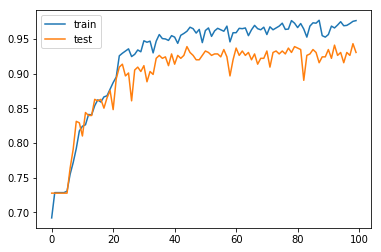

In [44]:
plt.plot(neural_network.history['acc'], label='train')
plt.plot(neural_network.history['val_acc'], label='test')
plt.legend()
plt.show()

# 5. Result

As you can see in the chart above we can receive pretty good results in our training and test set.

##### The best hyperparameter are:
activation_function1=relu, activation_output=relu, batch_size=100, dropout_rate=0.1, init_mode1=normal, init_mode_output=normal, optimizer=Adam, weight_constraint=3